<div align='right'> Mathematics in Machine Learning <br> Groupe GEMA - Academic Year 2021/22 </div><div align='center'> <h1 style="font-size:2.5em">D√©tection Pr√©ventive des D√©faillances Bancaires par Machine Learning</h1><br> </div><div> <p style='text-align:left;'> <strong>Encadrement p√©dagogique :</strong><br> ‚Ä¢ Prof. Pape Ciss√©<br> ‚Ä¢ Prof. Melody Delong <span style='float:right;'> <strong> Data Scientist :</strong><br> <a href='https://github.com/yeaf10' target='_blank'>ING. Fr√©d√©ric Yene</a><br> <em>IA SCHOOL Paris</em><br> <small>Projets avanc√©s en Machine Learning Financier</small> </span> </p> </div><div style="margin-top:20px; border-top:1px solid #ccc; padding-top:10px;"> <strong>Sp√©cialisation :</strong> Data Science | Intelligence Artificielle<br> <strong>Domaines d'expertise :</strong> <ul> <li>Analyse pr√©dictive des risques bancaires</li> <li>D√©veloppement d'algorithmes de scoring financier</li> <li>Data Mining pour la stabilit√© financi√®re</li> </ul> </div>

<div align='center'>  
    <h1>Contexte et Objectifs</h1>  
</div>  

<div><p><br>  
Dans le cadre de sa politique de gestion des risques et de conformit√© r√©glementaire, BNP Paribas s‚Äôengage √† d√©velopper des m√©thodologies avanc√©es pour l‚Äô√©valuation des risques de cr√©dit. La mesure pr√©cise des expositions au d√©faut au sein des portefeuilles de cr√©dit est un enjeu majeur, tant pour r√©pondre aux exigences prudentielles (B√¢le III, CRD IV) que pour optimiser la prise de d√©cision en mati√®re de gestion du risque.  

Cette initiative s‚Äôinscrit dans une d√©marche d‚Äôinnovation quantitative visant √† renforcer la robustesse des mod√®les de pr√©diction des d√©faillances. Notre recherche se concentre sur l‚Äôanalyse approfondie des algorithmes d‚Äôapprentissage automatique, avec une application cibl√©e sur les portefeuilles de cartes de cr√©dit. L‚Äôobjectif est de proposer des solutions pr√©dictives √† la fois pr√©cises, interpr√©tables et adapt√©es aux sp√©cificit√©s des donn√©es clients de la banque.  

En capitalisant sur une approche math√©matique rigoureuse, ce projet contribue √† l‚Äôexcellence op√©rationnelle de BNP Paribas en mati√®re de risk analytics, tout en s‚Äôalignant sur les meilleures pratiques du secteur.  
</p></div>

from IPython.display import HTML

HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# A-Importation des biblioth√®ques

In [2]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

# Table des mati√®res
1. [Introduction](#introduction)<br>
2. [Analyse Exploratoire des Donn√©es](#eda)<br>
    2.1 [Description du Jeu de Donn√©es](#description)<br>
    2.2 [Nettoyage des Donn√©es](#cleaning)<br>
    2.3 [Exploration des Donn√©es](#exploration)<br>
    2.4 [Corr√©lation entre Variables](#correlation)<br>
    2.5 [V√©rification de la Normalit√©](#normality)<br>
3. [Pr√©traitement des Donn√©es](#preprocessing)<br>
    3.1 [Gestion des Variables Cat√©gorielles](#one-hot)<br>
    3.2 [Partitionnement des Donn√©es](#train-test)<br>
    3.3 [Mise √† l'√âchelle des Variables](#scaling)<br>
    3.4 [R√©duction de Dimensionnalit√©](#pca)<br>
    3.5 [Gestion des Classes D√©s√©quilibr√©es](#imbalance)<br>
4. [M√©thodologie d'√âvaluation des Mod√®les](#method)<br>
    4.1 [Validation](#validation)<br>
    4.2 [M√©triques d'√âvaluation de Performance](#metrics)<br>
5. [Mod√®les de Classification](#models)<br>
    5.1 [R√©gression Logistique](#logistic)<br>
    5.2 [Machines √† Vecteurs de Support (SVM)](#svm)<br>
    5.3 [M√©thodes Arborescentes](#tree)<br>
    5.4 [R√©sultats de Performance des Mod√®les](#results)<br>
6. [Conclusion](#conclusion)<br>

    [R√©f√©rences](#references)

<a id='introduction'></a>
# 1. Introduction
En 2004, BNP Paribas, l‚Äôune des principales banques europ√©ennes, a connu une forte croissance de ses activit√©s de cr√©dit √† la consommation, notamment par la g√©n√©ralisation de la distribution de cartes de cr√©dit. Dans un contexte de concurrence accrue et de lib√©ralisation des produits financiers, la banque a assoupli ses crit√®res d‚Äôoctroi de cr√©dit afin de capter une client√®le plus large. Cependant, cette politique agressive de d√©veloppement s‚Äôest accompagn√©e d‚Äôun risque croissant de surendettement.

De nombreux clients ont re√ßu des cartes de cr√©dit ou des facilit√©s de tr√©sorerie sans disposer de garanties solides sur leur capacit√© r√©elle de remboursement. Beaucoup ont eu recours √† ces produits au-del√† de leurs moyens, accumulant des dettes importantes. Le d√©faut de paiement ‚Äî c‚Äôest-√†-dire l‚Äôincapacit√© d‚Äôun client √† rembourser ses dettes selon les conditions pr√©vues ‚Äî est devenu une probl√©matique majeure pour la banque. Cette situation a mis en lumi√®re la n√©cessit√© de renforcer les dispositifs de pr√©vention et d‚Äôanalyse du risque de cr√©dit.

Dans un syst√®me financier bien structur√©, la gestion de crise intervient en aval, tandis que la pr√©diction du risque intervient en amont. L‚Äôobjectif principal de cette pr√©diction est d‚Äôexploiter des donn√©es financi√®res ‚Äî telles que les historiques de transactions, les profils clients, et les comportements de remboursement ‚Äî pour anticiper les risques de d√©faut et limiter les pertes.

Dans ce projet, nous nous concentrons sur le cas de BNP Paribas en 2004 et cherchons √† pr√©dire de mani√®re fiable les clients les plus susceptibles de faire d√©faut. Gr√¢ce √† un mod√®le automatis√© bas√© sur des donn√©es clients et historiques, nous visons √† identifier les facteurs cl√©s qui influencent le comportement de remboursement, afin d‚Äôaider la banque √† mieux anticiper les risques et proposer des solutions adapt√©es (comme la restructuration de dette ou le report d‚Äô√©ch√©ance) avant que la situation ne se d√©t√©riore.

<a id='eda'></a>
# 2. Analyse Exploratoire des Donn√©es

<a id='description'></a>
## 2.1 Description du Jeu de Donn√©es
Notre √©tude repose sur le jeu de donn√©es Default of credit card clients issu du d√©p√¥t UCI Machine Learning 
2
2. Il contient 30 000 observations collect√©es par une banque en Allemagne sur des titulaires de cartes de cr√©dit distincts, entre avril 2005 et septembre 2005.

La variable cible du jeu de donn√©es est une variable binaire appel√©e default.payment.next.month. Elle indique si le titulaire de la carte sera ou non en situation de d√©faut de paiement le mois suivant (Oui = 1, Non = 0).

Les 23 variables explicatives suivantes sont utilis√©es pour pr√©dire ce d√©faut :

- Client personal information:
    1. `LIMIT_BAL`: Montant du cr√©dit accord√© (en nouveaux dollars ALLEMANDS) : il comprend √† la fois le cr√©dit √† la consommation de l'individu et son cr√©dit familial (suppl√©mentaire)..
    2. `SEX `: 1 = homme ; 2 = femme.
    3. `EDUCATION` : 1 = √©cole sup√©rieure (type master ou doctorat) ; 2 = universit√© ; 3 = lyc√©e ; 4 = autres.
    4. `MARRIAGE `: Statut marital ‚Äî 1 = mari√© ; 2 = c√©libataire ; 3 = autres.
    5.  `AGE `: √Çge du client (en ann√©es).   
- Historique des paiements effectu√©s d‚Äôavril √† septembre 2005 (c‚Äôest-√†-dire les retards de paiement par mois) :
PAY_0 : Statut de remboursement en septembre 2005.

   6. `PAY_2` : Statut de remboursement en ao√ªt 2005.

   7. `PAY_3` : Statut de remboursement en juillet 2005.

   8. `PAY_4 `: Statut de remboursement en juin 2005.

   9. `PAY_5` : Statut de remboursement en mai 2005.

  10. `PAY_6` : Statut de remboursement en avril 2005.

      √âchelle de mesure du statut de remboursement :
-1 = paiement effectu√© √† temps ;
1 = retard de 1 mois ;
2 = retard de 2 mois ;
...
8 = retard de 8 mois ;
9 = retard de 9 mois ou plus.
 
 
- Montant des factures (en euros), c‚Äôest-√†-dire le relev√© mensuel envoy√© par les soci√©t√©s de cartes de cr√©dit :
    12. `BILL_AMT1`: Montant de la facture en septembre 2005.
    13. `BILL_AMT2`: Montant de la facture en ao√ªt 2005.
    14. `BILL_AMT3`: Montant de la facture en juillet 2005.
    15. `BILL_AMT4`: Montant de la facture en juin 2005.
    16. `BILL_AMT5`: Montant de la facture en mai 2005.
    17. `BILL_AMT6`: Montant de la facture en avril 2005.
- Montant des paiements pr√©c√©dents (en euros) :
    18. `PAY_AMT1`: Montant du paiement effectu√© en septembre 2005.
    19. `PAY_AMT2`: Montant du paiement effectu√© en ao√ªt 2005.
    20. `PAY_AMT3`: Montant du paiement effectu√© en juillet 2005.
    21. `PAY_AMT4`: Montant du paiement effectu√© en juin 2005.
    22. `PAY_AMT5`: Montant du paiement effectu√© en mai 2005.
    23. `PAY_AMT6`: Montant du paiement effectu√© en avril 2005.
    
Afin de comprendre √† quoi ressemblent les donn√©es, nous imprimons quelques observations dans le tableau ci-dessous. La cible `default.payment.next.month` est renomm√©e `DEFAULT` pour √™tre plus courte, tandis que la colonne `PAY_0` est renomm√©e `PAY_1`.`.

In [3]:
# read and creation of dataframe
df = pd.read_csv('dataset/default_of_credit_card_clients.csv', index_col='ID')
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   
3       0  ...      14331      14948      15549      1518      1500      1000   
4       0  ...      28314      28959      29547      2000      2019      1200   
5       0  ...      20940      19146      19131      2000     36681     10000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
ID                                         
1          0         0         0        1  
2       1000         0      2000        1  
3       1000      1000      5000        0  
4       1100      1069      1000        0  
5       9000       689       679        0  

[5 rows x 24 columns]

The information on the dataset reported below show that there are no missing features for any of the $30,000$ samples.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<a id='cleaning'></a>

## 2.2 Nettoyage des donn√©es
### 2.2.1 Informations personnelles des clients
Ci-dessous, nous affichons la description des variables li√©es aux informations personnelles des clients. Les attributs `LIMIT_BAL`, `SEX` et `AGE` semblent coh√©rents avec la description fournie par 
2, tandis que `EDUCATION` et `MARRIAGE` pr√©sentent certaines cat√©gories non document√©es.
La variable EDUCATION varie de 0 √† 6, et MARRIAGE commence √† la cat√©gorie 0.

In [5]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000
mean    167484.322667      1.603733      1.853133      1.551867     35.485500
std     129747.661567      0.489129      0.790349      0.521970      9.217904
min      10000.000000      1.000000      0.000000      0.000000     21.000000
25%      50000.000000      1.000000      1.000000      1.000000     28.000000
50%     140000.000000      2.000000      2.000000      2.000000     34.000000
75%     240000.000000      2.000000      2.000000      2.000000     41.000000
max    1000000.000000      2.000000      6.000000      3.000000     79.000000

In [6]:
df['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [7]:
df['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

La pr√©sence d'erreurs dans le jeu de donn√©es peut √™tre trait√©e soit en corrigeant les attributs erron√©s, soit en supprimant les lignes associ√©es aux erreurs. Nous pourrions adopter une approche prudente en regroupant les cat√©gories non document√©es dans une cat√©gorie autres, mais comme le nombre d‚Äôentr√©es anormales est relativement faible `(399, soit 1,33‚ÄØ% du total)`, nous d√©cidons de les √©liminer.

In [8]:
# remove useless and incorrect information
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")

# Alternative
# df['MARRIAGE'] = np.where(df['MARRIAGE']==0, 3, df['MARRIAGE'])
# df['EDUCATION'] = np.where(df['EDUCATION']==0, 4, df['EDUCATION'])
# df['EDUCATION'] = np.where(df['EDUCATION']==5, 4, df['EDUCATION'])
# df['EDUCATION'] = np.where(df['EDUCATION']==6, 4, df['EDUCATION'])

Dataset size before:	30000
Dataset size after:	29601


### 2.2.2 Historique des Paiements Ant√©rieurs
Nous pr√©sentons ci-dessous une description des variables relatives √† l‚Äôhistorique des paiements ant√©rieurs. Les colonnes intitul√©es `PAY_n `(o√π n d√©signe le mois correspondant) comportent des valeurs comprises entre -2 (correspondant √† des cas non document√©s) et 8. Cette √©chelle de codage sugg√®re la n√©cessit√© d'une normalisation afin d‚Äôassurer la coh√©rence avec les d√©finitions officielles du jeu de donn√©es. Une telle op√©ration de re-codage permettrait une meilleure interpr√©tabilit√© des niveaux d‚Äôarri√©r√©s de paiement, tout en facilitant leur int√©gration dans des mod√®les analytiques ou pr√©dictifs.

In [9]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29601.000000  29601.000000  29601.000000  29601.000000  29601.000000   
mean      -0.014932     -0.131313     -0.163440     -0.218303     -0.263978   
std        1.124503      1.199642      1.199793      1.172220      1.136217   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  29601.000000  
mean      -0.287558  
std        1.152206  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [10]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

### 2.2.3 Montant des Factures et Paiements Pr√©c√©dents
Nous pr√©sentons ci-dessous la description des variables relatives au montant des factures mensuelles ainsi qu‚Äôaux paiements effectu√©s pr√©c√©demment. Apr√®s analyse, aucune anomalie n‚Äôa √©t√© d√©tect√©e dans ces variables. Les donn√©es semblent coh√©rentes et correctement renseign√©es, ce qui permet de les utiliser directement dans les traitements statistiques ou les mod√®les pr√©dictifs sans n√©cessiter de nettoyage ou de transformation pr√©alable

In [11]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   29601.000000   29601.000000  2.960100e+04   29601.000000   
mean    50957.432012   48942.189554  4.680320e+04   43122.554204   
std     73370.242404   70923.985151  6.912389e+04   64196.383913   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3528.000000    2970.000000  2.652000e+03    2329.000000   
50%     22259.000000   21050.000000  2.003500e+04   19005.000000   
75%     66623.000000   63497.000000  5.983000e+04   54271.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   29601.000000   29601.000000  
mean    40235.545184   38858.449816  
std     60699.344884   59519.893043  
min    -81334.000000 -339603.000000  
25%      1780.000000    1278.000000  
50%     18091.000000   17118.000000  
75%     50072.000000   49121.000000  
max    927171.000000  961664.000000

In [12]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   29601.000000  2.960100e+04   29601.000000   29601.000000   
mean     5649.560319  5.894788e+03    5198.415898    4828.659268   
std     16568.264941  2.308919e+04   17580.914806   15711.057992   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.250000e+02     390.000000     298.000000   
50%      2100.000000  2.007000e+03    1800.000000    1500.000000   
75%      5005.000000  5.000000e+03    4500.000000    4014.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   29601.000000   29601.000000  
mean     4795.032735    5181.326374  
std     15244.217154   17657.260739  
min         0.000000       0.000000  
25%       259.000000     138.000000  
50%      1500.000000    1500.000000  
75%      4042.000000    4000.000000  
max    426529.000000  528666.000000

<a id='exploration'></a>
## 2.3 Exploration des Donn√©es
Dans cette section, nous pr√©sentons quelques graphiques visant √† mieux comprendre la relation entre les diff√©rentes variables explicatives et la variable cible DEFAULT.

Tout d‚Äôabord, nous constatons que le jeu de donn√©es pr√©sente un d√©s√©quilibre notable : seuls `6 636 clients` sont en d√©faut de paiement, ce qui repr√©sente `22,1‚ÄØ%` de l‚Äôensemble. Ce d√©s√©quilibre constitue un probl√®me important qui m√©rite une attention particuli√®re. En effet, si ce d√©s√©quilibre est ignor√©, les mod√®les de classification auront tendance √† privil√©gier la classe majoritaire (clients non d√©faillants) au d√©triment de la classe minoritaire (clients en d√©faut), ce qui peut gravement nuire √† la performance du mod√®le sur les cas les plus critiques 
3

In [13]:
df['DEFAULT'].value_counts()

0    22996
1     6605
Name: DEFAULT, dtype: int64

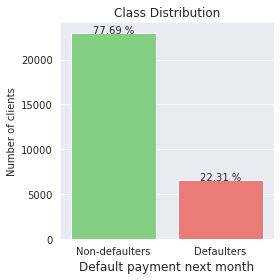

In [14]:
# Class distribution
plt.figure(figsize = (4,4))
graph_target = sns.countplot(x="DEFAULT", data=df, palette=['#77DD76','#FF6962'])

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * df["DEFAULT"].value_counts()[i] / len(df),2)
    
    str_plot = f'{percentage} %'
    
    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1
    
plt.title('Class Distribution')
plt.xticks([0,1],['Non-defaulters', 'Defaulters'])
plt.xlabel('Default payment next month', fontsize=12)
plt.ylabel('Number of clients')
plt.tight_layout()

plt.savefig('images/imbalanced_plot.svg')
plt.show()

Pour la variable `LIMIT_BAL`, une analyse de densit√© conditionnelle par classe de la variable cible DEFAULT met en √©vidence une distinction marqu√©e : les individus ayant une limite de cr√©dit inf√©rieure √† environ `140 000 `pr√©sentent une densit√© de d√©faut plus √©lev√©e que celle des non-d√©faillants dans cette m√™me tranche.

Cette tendance sugg√®re une corr√©lation inverse entre le montant de cr√©dit accord√© et la probabilit√© de d√©faut. Cela s‚Äôaligne avec une interpr√©tation statistique plausible : les clients disposant de limites de cr√©dit plus √©lev√©es sont g√©n√©ralement per√ßus comme ayant un profil de risque plus faible, leur historique financier ou leur score de solvabilit√© √©tant jug√©s plus favorables. Cette variable pourrait donc s‚Äôav√©rer discriminante dans un mod√®le de scoring, et m√©rite une attention particuli√®re lors de la phase de s√©lection des variables.

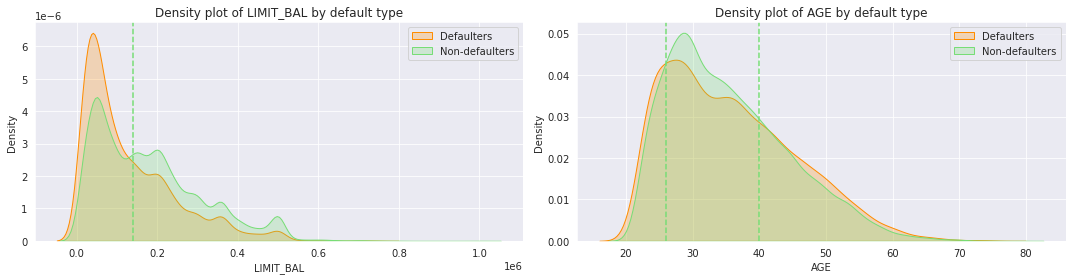

In [15]:
# Kernel density distribution
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.savefig('images/continuosDistribution.svg')
plt.show()

Pour la variable AGE, une analyse visuelle similaire (voir graphique ci-dessus √† droite) r√©v√®le que la probabilit√© de non-d√©faut est plus √©lev√©e chez les individus √¢g√©s d‚Äôenviron $25$ √† $40$ ans. Cela sugg√®re que les consommateurs de cette tranche d‚Äô√¢ge pr√©sentent une meilleure capacit√© de remboursement des emprunts li√©s aux cartes de cr√©dit. Cette observation peut s‚Äôexpliquer par une plus grande stabilit√© professionnelle et personnelle √† cette p√©riode de la vie, associ√©e √† une pression financi√®re encore mod√©r√©e.

En ce qui concerne les variables cat√©gorielles `SEX`, `EDUCATION et MARRIAG`E, des histogrammes conditionn√©s par la variable cible montrent une distribution des d√©fauts globalement coh√©rente avec la r√©partition g√©n√©rale des populations dans chaque cat√©gorie. Autrement dit, le taux de d√©faut observ√© chez les hommes et les femmes, ainsi que selon le niveau d‚Äô√©ducation ou le statut marital, ne pr√©sente pas de d√©s√©quilibre flagrant. Cela indique que, prises isol√©ment, ces variables pourraient avoir une capacit√© discriminante limit√©e, bien qu‚Äôelles puissent s‚Äôav√©rer utiles lorsqu‚Äôelles interagissent avec d‚Äôautres variables dans un mod√®le multivari√©.

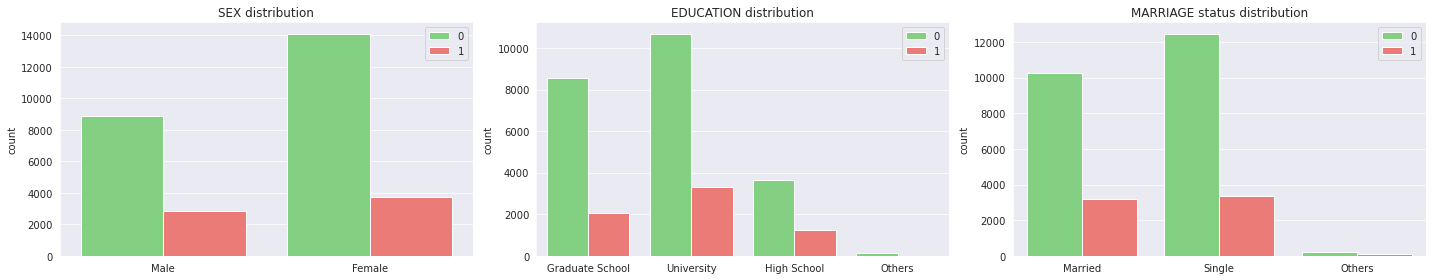

In [16]:
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].set_title('SEX distribution')
sns.countplot(x='SEX', hue='DEFAULT', data=df, ax=axs[0])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].set_xlabel('')
axs[0].legend()

axs[1].set_title('EDUCATION distribution')
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df, ax=axs[1])
axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
axs[1].set_xlabel('')
axs[1].legend()

axs[2].set_title('MARRIAGE status distribution')
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df, ax=axs[2])
axs[2].set_xticklabels(['Married', 'Single', 'Others'])
axs[2].set_xlabel('')
axs[2].legend()

fig.tight_layout()
plt.savefig('images/categoricalDistribution.svg')
plt.show()

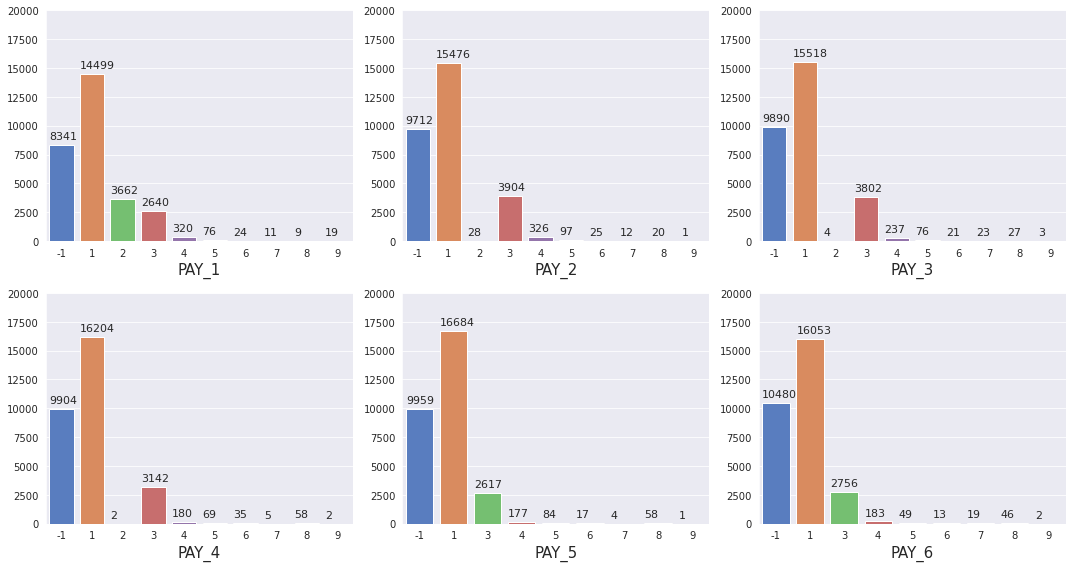

In [17]:
PAY_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,8))

for i, col in enumerate(PAY_cols):    
    plt.subplot(2,3,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'muted')
    plt.ylim(0,20000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()+500), fontsize = 11)

plt.savefig('images/categoricalPAY.svg')
plt.show()

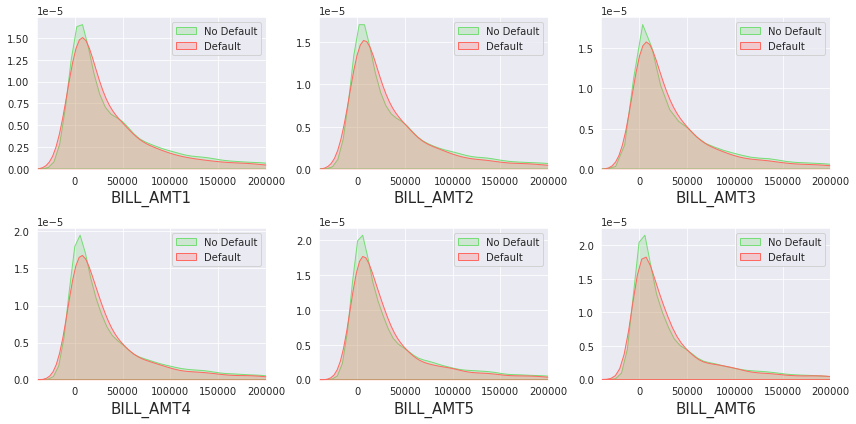

In [18]:
BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(BILL_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default',color='#77DD76', shade=True)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', color='#FF6962', shade=True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.savefig('images/continuousBILLAMT.svg')
plt.show()

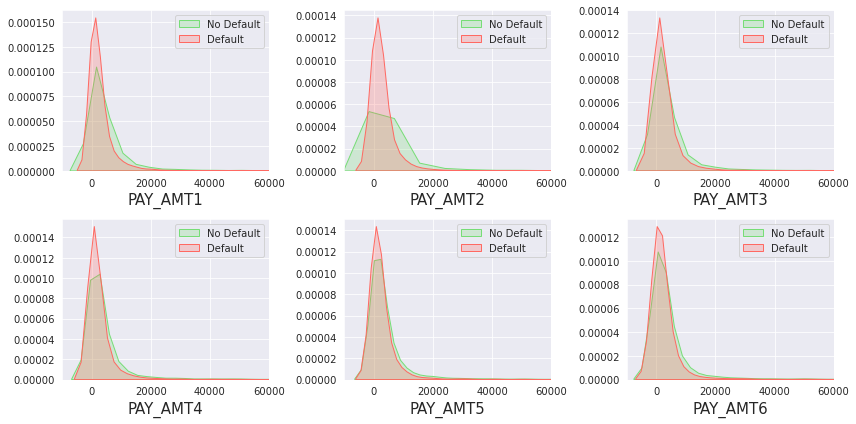

In [19]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', shade = True, color='#FF6962')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
    
plt.savefig('images/continuousPAYAMT.svg')
plt.show()

L‚Äôensemble des variables li√©es au statut de remboursement (PAY_n) est visualis√© ci-dessous √† l‚Äôaide de diagrammes en bo√Æte. Il en ressort que les clients accusant un retard de paiement d‚Äôun mois ou moins pr√©sentent un taux de d√©faut significativement plus faible.

Par ailleurs, la variable PAY_1, qui correspond au statut de remboursement du mois de septembre, semble poss√©der un pouvoir discriminant particuli√®rement √©lev√© par rapport aux autres mois. Cela peut s‚Äôexpliquer par le fait que `PAY_1` est la plus r√©cente des observations disponibles, refl√©tant donc de mani√®re plus imm√©diate la situation financi√®re actuelle du client. Cette variable est donc susceptible de jouer un r√¥le central dans la pr√©diction du d√©faut et pourrait √™tre prioris√©e lors de la phase de s√©lection de caract√©ristiques.

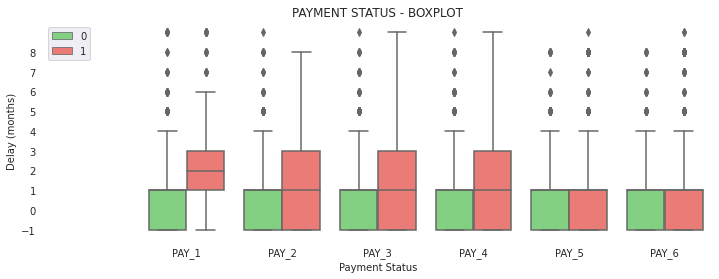

In [20]:
repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]
repayment = pd.melt(repayment, 
                    id_vars="DEFAULT",
                    var_name="Payment Status",
                    value_name='Delay (months)')


plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="DEFAULT", data=repayment, palette=sns.color_palette(('#77DD76','#FF6962')))
plt.xlim([-1.5,5.5])
plt.ylim([-1.5,9.5])
plt.yticks(np.arange(-1,9))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend()
plt.savefig('images/BoxplotPAY.svg')
plt.box(False)
`

<a id='correlation'></a>
## 2.4 Corr√©lation entre les Variables
Le jeu de donn√©es analys√© comporte un nombre important de variables explicatives. La pr√©sence de variables fortement corr√©l√©es peut nuire aux performances de certains algorithmes de classification, en particulier ceux qui reposent sur l‚Äôhypoth√®se d‚Äôind√©pendance entre les pr√©dicteurs (comme la r√©gression logistique na√Øve ou certains mod√®les bay√©siens).

De plus, la redondance entre variables peut entra√Æner une complexit√© inutile dans le mod√®le, augmenter le risque de surapprentissage et ralentir les temps d'entra√Ænement. Une r√©duction de dimensionnalit√© (par exemple via l‚Äôanalyse en composantes principales ou une s√©lection de variables bas√©e sur la corr√©lation) peut donc s‚Äôav√©rer b√©n√©fique, en am√©liorant la robustesse, la performance et l'interpr√©tabilit√© des mod√®les. Cette √©tape est particuli√®rement pertinente avant l‚Äôapplication d‚Äôalgorithmes sensibles √† la colin√©arit√© comme les mod√®les lin√©aires ou les SVM.

Le coefficient de corr√©lation de Pearson $\rho$ permet de quantifier la relation lin√©aire entre deux variables, en mesurant la force et la direction de leur association. Il s‚Äôagit d‚Äôun indicateur fondamental dans l‚Äôanalyse exploratoire des donn√©es, notamment pour d√©tecter la redondance entre variables.

Math√©matiquement, il est d√©fini comme le rapport entre la covariance des deux variables $X$ et $Y$ (au num√©rateur) et le produit de leurs √©carts-types (au d√©nominateur), soit :

ùúå
ùëã
,
ùëå
=
C
o
v
(
ùëã
,
ùëå
)
ùúé
ùëã
‚ãÖ
ùúé
ùëå
œÅ 
X,Y
‚Äã
 = 
œÉ 
X
‚Äã
 ‚ãÖœÉ 
Y
‚Äã
 
Cov(X,Y)
‚Äã
 
o√π :

$\mathrm{Cov}(X, Y)$ est la covariance entre $X$ et $Y$,

$\sigma_X$ et $\sigma_Y$ sont les √©carts-types de $X$ et $Y$ respectivement.

La valeur de $\rho$ est comprise entre $-1$ et $1$ :

$\rho = 1$ : corr√©lation lin√©aire positive parfaite,

$\rho = -1$ : corr√©lation lin√©aire n√©gative parfaite,

$\rho = 0$ : absence de corr√©lation lin√©aire (mais pas n√©cessairement d‚Äôind√©pendance).
$$\rho_{X,Y}=\frac{\text{Cov}(X,Y)}{\sigma_X\sigma_Y} \tag{2.1}$$

The value of Pearson‚Äôs Correlation Coefficient can be between $-1$ and $+1$.
- $+1$ means that they are highly correlated,
- $0$ means no correlation,
- $-1$ means that there is a negative correlation (inverse proportion).

Note that the Pearson‚Äôs correlation Coefficient is only able to capture linear trends, hence it might lead to a value of $0$ for strongly non-linearly correlated variables (e.g. quadratic trend).

Below we show only the lower half of the correlation matrix between the numeric features (diagonal excluded).

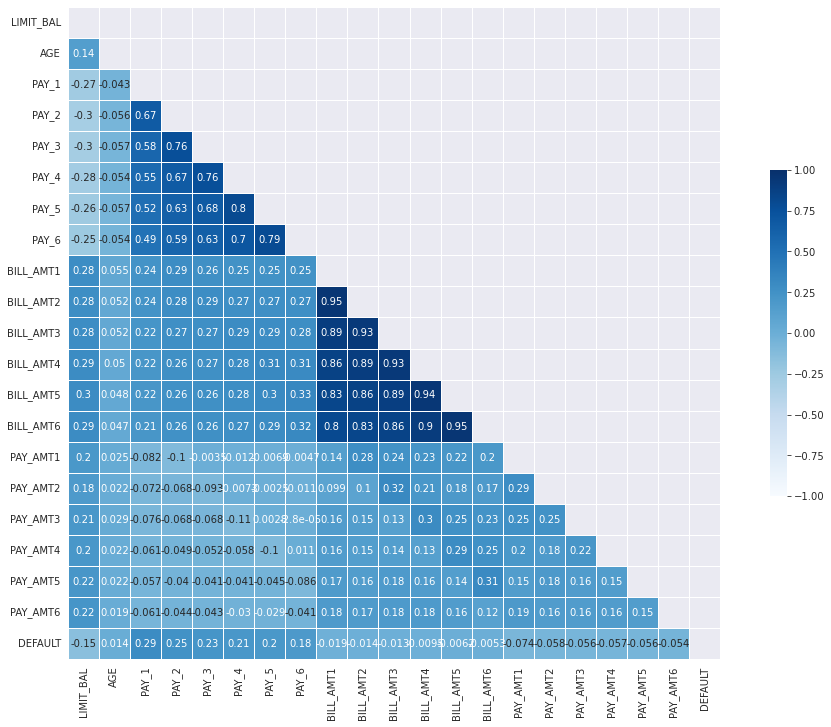

In [21]:
numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar
plt.savefig('images/correlation.svg')

On constate une forte corr√©lation positive entre les variables `BILL_AMTn`, indiquant une redondance d‚Äôinformation. Les scatterplots montrent une relation lin√©aire marqu√©e entre ces variables, confirmant que `BILL_AMTn` contiennent des informations tr√®s similaires. Cela sugg√®re qu‚Äôune r√©duction de dimensionnalit√© pourrait √™tre b√©n√©fique.

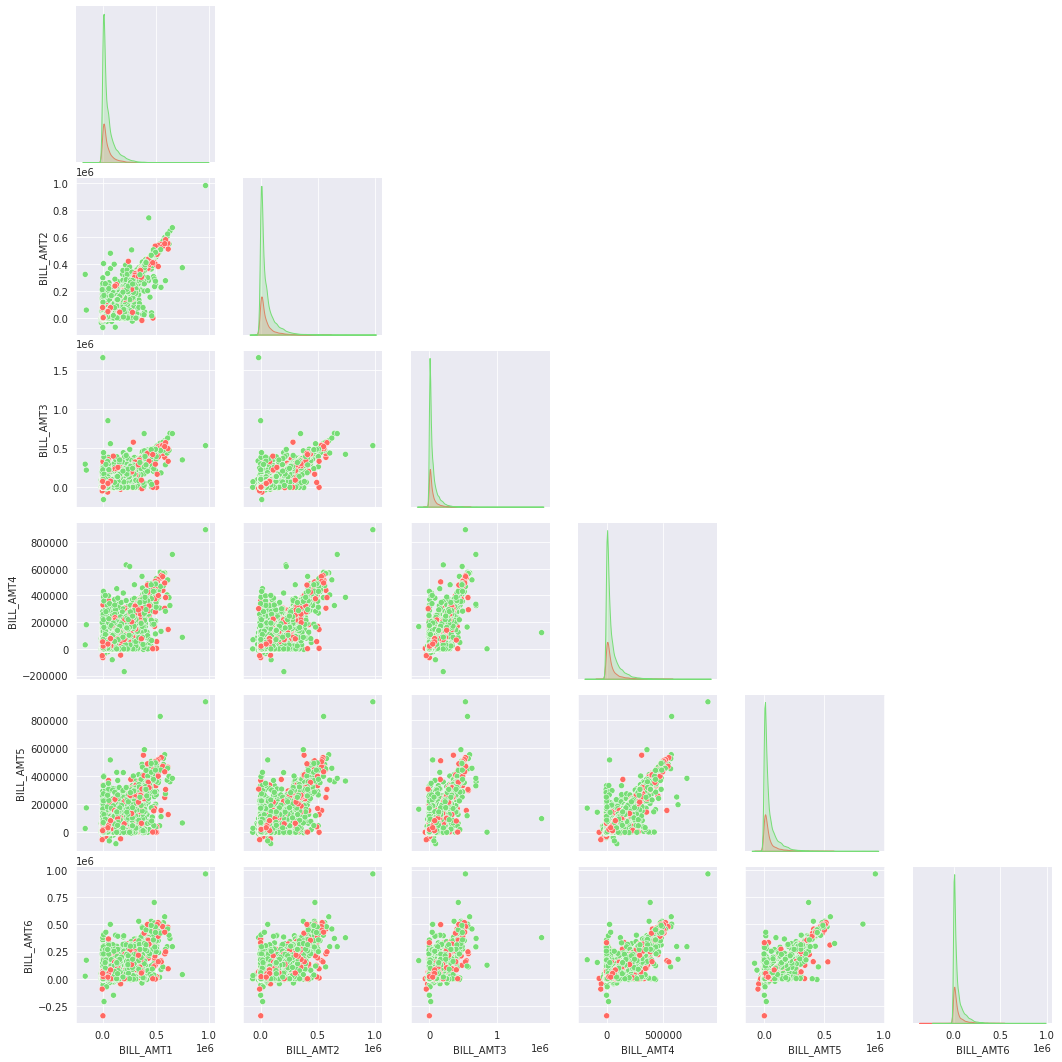

In [22]:
pair_plot = sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']], hue='DEFAULT', diag_kind='kde', corner=True)
pair_plot._legend.remove()
`

<a id='normality'></a>
## 2.5 V√©rification de la Normalit√©
Les m√©thodes statistiques param√©triques supposent souvent que les donn√©es suivent une distribution connue, g√©n√©ralement gaussienne. L‚Äôapplication de ces m√©thodes sur des donn√©es ne respectant pas cette hypoth√®se peut conduire √† des conclusions erron√©es.

Pour √©valuer qualitativement la normalit√© des donn√©es, nous utilisons le diagramme Quantile-Quantile (QQ plot). Ce graphique compare les quantiles des donn√©es observ√©es aux quantiles th√©oriques d‚Äôune distribution normale. Si les points s‚Äôalignent sur la diagonale √† 45¬∞, cela indique une distribution normale.

Les graphiques ci-dessous montrent clairement que les variables num√©riques du jeu de donn√©es ne suivent pas une distribution normale.


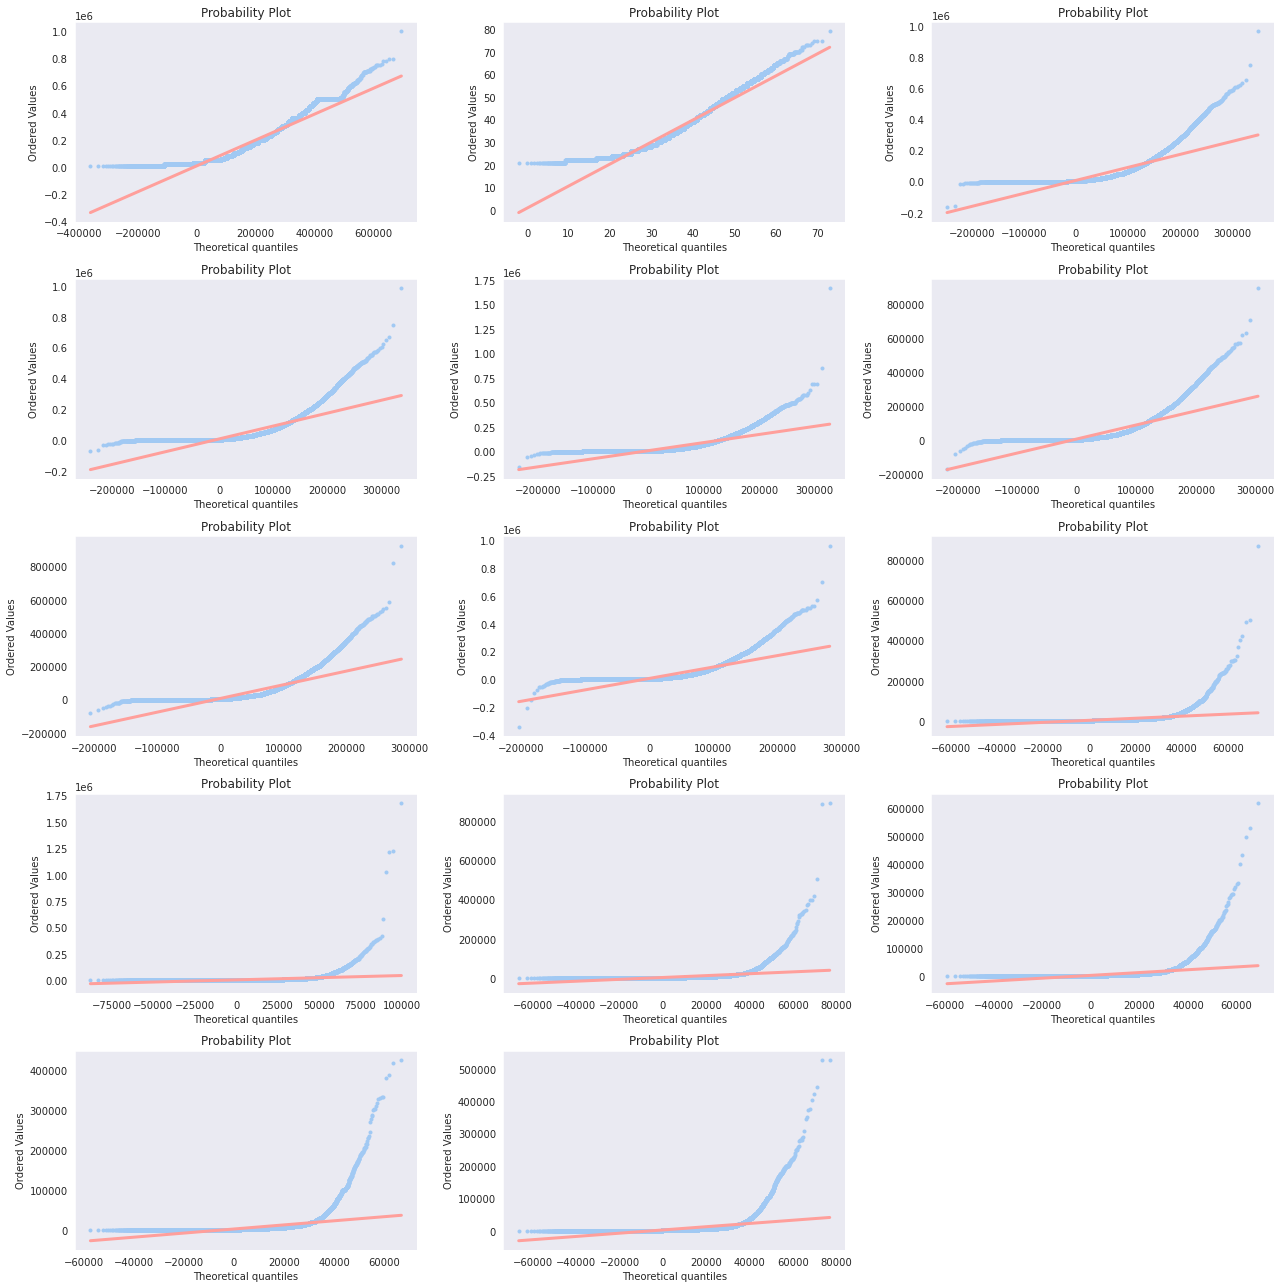

In [23]:
# Check gaussian distribution
sns.set_color_codes('pastel')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f], 
                   dist='norm', 
                   sparams=(df[f].mean(), df[f].std()), 
                   plot=axs[i,j])
    axs[i,j].get_lines()[0].set_marker('.')
    
    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
plt.savefig('images/QQplot.png')
plt.show()

<a id='preprocessing'></a>
# 3. Pr√©traitement des Donn√©es
La qualit√© des donn√©es et la quantit√© d‚Äôinformations pertinentes qu‚Äôelles contiennent sont des facteurs d√©terminants pour la performance d‚Äôun algorithme d‚Äôapprentissage automatique. Il est donc essentiel de contr√¥ler et de pr√©parer soigneusement le jeu de donn√©es avant de l‚Äôutiliser dans un mod√®le, afin d‚Äôoptimiser la qualit√© de l‚Äôapprentissage et la robustesse des r√©sultats.

<a id='one-hot'></a>
## 3.1 Gestion des Variables Cat√©gorielles
Les variables cat√©gorielles EDUCATION, SEX et MARRIAGE sont d√©j√† cod√©es sous forme d‚Äôentiers, ce qui permet de les utiliser directement dans un algorithme de machine learning. Cependant, ces variables sont nominales et il serait inappropri√© de leur attribuer un ordre, car cela induirait une relation ordinale sans signification r√©elle.

L‚Äôencodage one-hot est une m√©thode adapt√©e pour √©liminer toute notion d‚Äôordre entre les modalit√©s. Cette technique consiste √† cr√©er autant de variables binaires (dummy variables) que de modalit√©s uniques, chaque variable indiquant la pr√©sence ou l‚Äôabsence d‚Äôune cat√©gorie sp√©cifique. Ainsi, on √©vite les interpr√©tations erron√©es li√©es √† un codage num√©rique simple.

Bien que Scikit-Learn propose des m√©thodes pour r√©aliser automatiquement l‚Äôencodage one-hot, nous choisissons de proc√©der manuellement √©tant donn√© le faible nombre de variables concern√©es.
Cette approche nous permet de mieux ma√Ætriser la cr√©ation des variables bool√©ennes et de limiter le risque de multicolin√©arit√© qui peut survenir en pr√©sence de variables fortement corr√©l√©es.
Nous cr√©ons donc de nouvelles colonnes binaires correspondant aux diff√©rentes modalit√©s des variables `EDUCATION, SEX et MARRIAGE`, puis nous supprimons les colonnes d‚Äôorigine..
- `MALE` : 1 = homme ; 0 = femme
- `MARRIED` : 1 = statut marital mari√© ; 0 = autre
- `GRAD_SCHOOL` : 1 = niveau d‚Äô√©tudes sup√©rieur (graduate school) ; 0 = autre
- `UNIVERSITY` : 1 = niveau universitaire ; 0 = autre
- `HIGH_SCHOOL` : 1 = niveau lyc√©e ; 0 = autre

√Ä noter qu‚Äôaucune information importante n‚Äôest perdue en supprimant certaines colonnes d‚Äôorigine. Par exemple, nous avons retir√© la cat√©gorie `EDUCATION=4 (¬´ autres ¬ª)`, mais cette information reste implicite : si pour une observation `GRAD_SCHOOL = 0, UNIVERSITY = 0 et HIGH_SCHOOL = 0`, alors on peut en d√©duire que cette observation appartient √† la cat√©gorie ¬´ autres ¬ª

In [24]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
ID                                                                        
1       20000   24      3      3     -1     -1     -1     -1       3913   
2      120000   26     -1      3      1      1      1      3       2682   
3       90000   34      1      1      1      1      1      1      29239   
4       50000   37      1      1      1      1      1      1      46990   
5       50000   57     -1      1     -1      1      1      1       8617   

    BILL_AMT2  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  \
ID             ...                                                    
1        3102  ...         0         0         0         0        1   
2        1725  ...      1000      1000         0      2000        1   
3       14027  ...      1000      1000      1000      5000        0   
4       48233  ...      1200      1100      1069      1000        0   
5        5670  ...     10000      9000       689       679        0   

    GRAD_SCHOOL  UNIVERSITY  HIGH_SCHOOL   MALE  MARRIED  
ID                                                        
1         False        True        False  False     True  
2         False        True        False  False    False  
3         False        True        False  False    False  
4         False        True        False  False     True  
5         False        True        False   True     True  

[5 rows x 26 columns]

<a id='train-test'></a>
## 3.2 Partition du Jeu de Donn√©es
Pour √©valuer la capacit√© de g√©n√©ralisation des algorithmes de machine learning que nous allons utiliser, nous divisons le jeu de donn√©es en deux sous-ensembles : un jeu d'entra√Ænement et un jeu de test, selon une proportion de 3:1.
Afin de garantir que la r√©partition des classes de la variable cible DEFAULT reste coh√©rente dans les deux ensembles, nous appliquons une stratification lors de la s√©paration. Cela permet de pr√©server la distribution des classes minoritaire et majoritaire, ce qui est particuli√®rement important dans un contexte de donn√©es d√©s√©quilibr√©es.
Enfin, nous fixons `random_state = 24` pour assurer la reproductibilit√© des r√©sultats lors des exp√©rimentations.

In [25]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1, inplace=False)

In [26]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)
print('Training set shape: ', np.shape(X_train_raw))
print(f'- Defaulters:\t {len(y_train[y_train==1])}')
print(f'- Non-defaulters: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test_raw))
print(f'- Defaulters:\t {len(y_test[y_test==1])}')
print(f'- Non-defaulters: {len(y_test[y_test==0])}')

Training set shape:  (22200, 25)
- Defaulters:	 4954
- Non-defaulters: 17246
Test set shape:  (7401, 25)
- Defaulters:	 1651
- Non-defaulters: 5750


<a id='scaling'></a>
## 3.3 Mise √† l'√©chelle des fonctionnalit√©s
The majority of machine learning and optimization algorithms behave much better if numerical features are on the same scale. Decision trees and random forests are two of the very few machine learning algorithms where there is no need to worry about feature scaling, as they are scale invariant [\[4\]](#raschka).

Il existe deux approches communes pour mettre des caract√©ristiques diff√©rentes sur la m√™me √©chelle : **la normalisation** et **la standardisation**. La normalisation se r√©f√®re √† la remise √† l'√©chelle des caract√©ristiques dans un intervalle de $[0,1]$, qui est un cas particulier de *mise √† l'√©chelle minimum-maximum* :

$$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} \tag{3.1}$$.

Ici, $X$ est un exemple particulier, $X_{min}$ est la plus petite valeur dans une colonne de caract√©ristiques et $X_{max}$ est la plus grande valeur.

En utilisant la normalisation, nous centrons les colonnes de caract√©ristiques √† la moyenne $\mu=0$ avec l'√©cart type $\sigma=1$ de sorte que les colonnes de caract√©ristiques aient les m√™mes param√®tres qu'une distribution normale standard, ce qui facilite l'apprentissage des poids.
$$Z=\frac{X-\mu}{\sigma} \tag{3.2}$$

Pour fournir une r√©f√©rence √©quitable, nous ajustons les statistiques (min-max pour la normalisation, moyenne et √©cart-type pour la standardisation) sur l'ensemble d'apprentissage, puis nous transformons les ensembles d'apprentissage et de test en fonction de ces statistiques.

Nous comparons les deux approches en montrant les diagrammes en bo√Æte et en moustache des donn√©es mises √† l'√©chelle respectives. Remarquez le nombre √©lev√© de *valeurs aberrantes*. Nous n'√©liminons aucun √©chantillon en tant que valeur aberrante car la litt√©rature sur l'ensemble de donn√©es ne fournit pas d'informations √† ce sujet [\N-[1\N](#yeh2009)[\N-[3\N](#alam2021)[\N-[5\N](#chen2021), et nous manquons de connaissances sur le domaine.

Alors que la normalisation supprime l'effet des valeurs aberrantes, la standardisation conserve des informations √† leur sujet. Comme la technique que nous allons appliquer prochainement est sensible √† la pr√©sence de valeurs aberrantes, nous d√©cidons de poursuivre notre √©tude avec les donn√©es normalis√©es.

In [27]:
scaler = MinMaxScaler()
X_train_norm = X_train_raw.copy()
X_test_norm = X_test_raw.copy()

X_train_norm['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_norm['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_norm['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_norm['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    X_train_norm['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_train_norm['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_norm['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

In [28]:
scaler = StandardScaler()
X_train_std = X_train_raw.copy()
X_test_std = X_test_raw.copy()

X_train_std['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_std['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_std['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_std['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    X_train_std['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_train_std['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_std['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

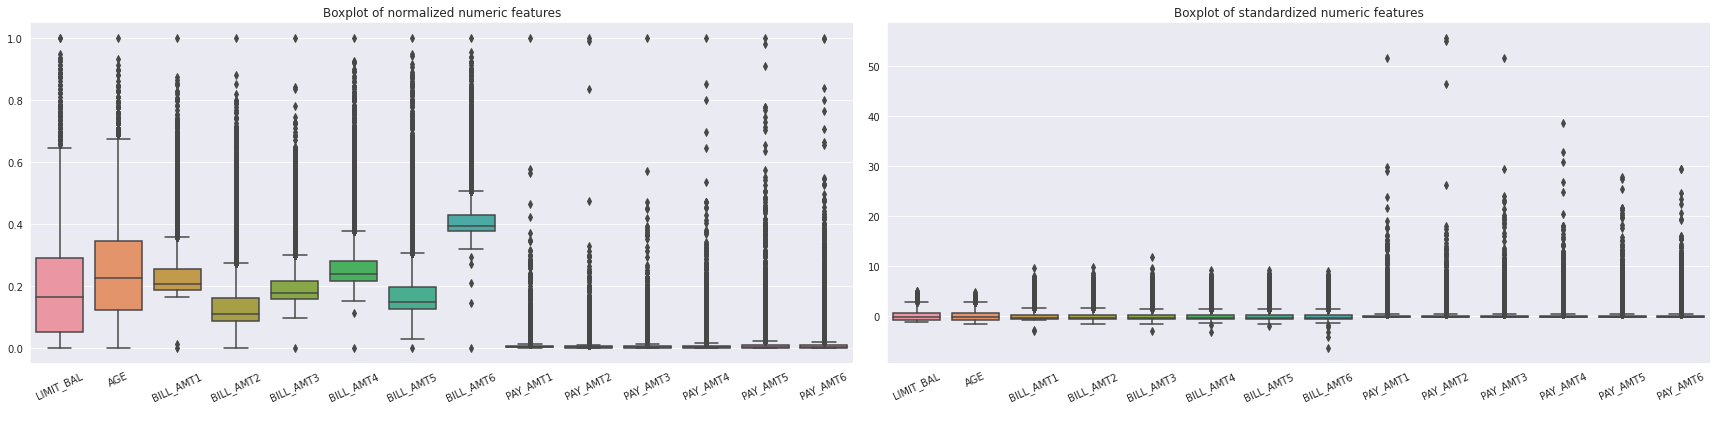

In [29]:
sns.set_color_codes('deep')
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
fig, axs = plt.subplots(1, 2, figsize=(24,6))

sns.boxplot(data=X_train_norm[numeric], ax=axs[0])
axs[0].set_title('Boxplot of normalized numeric features')
axs[0].set_xticklabels(labels=numeric, rotation=25)
axs[0].set_xlabel(' ')

sns.boxplot(data=X_train_std[numeric], ax=axs[1])
axs[1].set_title('Boxplot of standardized numeric features')
axs[1].set_xticklabels(labels=numeric, rotation=25)
axs[1].set_xlabel(' ')

fig.tight_layout()
plt.savefig('images/normalized.svg')
plt.show()

<a id='pca'></a>
## 3.4 Dimensionality Reduction
As we mentioned in [2.4](#correlation), many algorithms benefit from the removal of strongly correlated features, and in general from the reduction of the dimensionality of the data. The presence of many features leads to excessively complex models, which fit the parameters too closely with regard to the particular observations in the training set, but do not generalize well to new data. We say that these models have a *high variance* and are *overfitting* the training set. 

The problem of overfitting becomes even more serious in the case of the *K-means algorithm* due to the **curse of dimensionality**. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.

Simpler models can be obtained by requiring fewer parameters to fit the data. In addition to a lower computation cost and better interpretability, we also get a better generalization ability. The dimensionality reduction process can be carried out by means of *feature selection* or *feature extraction*. Via feature selection, we select a subset of the original features, whereas in feature extraction, we derive information from the feature set to construct a new feature subspace. In the context of dimensionality reduction, feature extraction can be understood as an approach to data compression with the goal of maintaining most of the relevant information.

Now, one could manually discard the highly correlated features we found earlier. However, we decide to keep them to perform **Principal Component Analysis**, a feature extraction technique.

### 3.4.1 Pricipal Component Analysis in a Nutshell
Pricipal Component Analysis (PCA) is an unsupervised linear transformation technique that helps us to identify patterns in data based on the correlation between features. In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one  [\[4\]](#raschka). The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance, given the constraint that the new feature axes are orthogonal to each other, as illustrated in the following figure.

<figure>
    <img src="images/pca.png" alt="Principal Component Analysis" style="width: 20em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 3.1 - Principal Compontents in a 2-dimensional example <a href='#raschka'>[4]</a>.</figcaption>
</figure>

In the preceding figure, $x_1$ and $x_2$ are the original feature axes, and $PC1$ and $PC2$ are the principal components.
### 3.4.2 PCA Derivation
Let $\mathbf{x}_1,...,\mathbf{x}_m$ be the $m$ sample vectors in $\mathbb{R}^d$ from our dataset. The problem of dimensionality reduction can often be seen as embedding the original data from $\mathbb{R}^d$ into a new space $\mathbb{R}^n$, whose dimensionality is much smaller ($n<d$) [\[6\]](#shalev).

PCA performs dimensionality reduction as a simple autoencoder, which carries out compression and recovery by linear transformations. The idea is to find a matrix $W\in\mathbb{R}^{n,d}$ that induces the mapping

$$\mathbf{x}\mapsto W\mathbf{x},\qquad\mathbf{x}\in\mathbb{R}^d,\text{ }W\mathbf{x}\in\mathbb{R}^n\text{ }(n<d)$$

and a second matrix $U\in\mathbb{R}^{d,n}$ that is able to recover each original vector $\mathbf{x}$ from its compressed version $\mathbf{y}=W\mathbf{x}$. In general, the exact recovery is impossible and PCA aims to find the linear transformations for which the differences between the recovered vectors $\mathbf{\tilde{x}}=U\mathbf{y}$ and the original vectors $\mathbf{x}$ are minimal in the least squared sense:

$$\underset{W\in\mathbb{R}^{n,d},\text{ }U\in\mathbb{R}^{d,n}}{\operatorname{argmin}}{\sum_{i=1}^{m}{\|\mathbf{x}_i-UW\mathbf{x}_i\|^2_2}} \label{opt_min}\tag{3.4}$$

The optimal solution $(U,W)$ of this problem takes the following form:
- the columns of $U$ are orthonormal: $U^\top U=\mathbb{I}_n\in\mathbb{R}^n$;
- $W=U^\top$.

Hence, we can write:

$$\underset{U\in\mathbb{R}^{d,n}: U^\top U=\mathbb{I}_n}{\operatorname{argmin}}{\sum_{i=1}^{m}{\|\mathbf{x}_i-UU^\top\mathbf{x}_i\|^2_2}}$$

It can be proven that:

$$\|\mathbf{x}-UU^\top\mathbf{x}\|^2=\|\mathbf{x}\|^2-\operatorname{tr}{(U^\top\mathbf{x}\mathbf{x}^\top U)}$$

where the trace $\operatorname{tr}$ of a matrix is the sum of its diagonal entries, i.e., a linear operator. This allows us to rewrite Equation (\ref{opt_min}) as the following maximization problem:

$$\underset{U\in\mathbb{R}^{d,n}: U^\top U=\mathbb{I}_n}{\operatorname{argmax}}{\operatorname{tr}{\Bigg( U^\top \sum_{i=1}^{m}{\mathbf{x}_i\mathbf{x}_i^\top}U\Bigg)}} \label{opt_max}\tag{3.5}$$

Now, we can define the **scatter matrix** $A=\sum_{i=1}^{m}{\mathbf{x}_i\mathbf{x}_i^\top}$, and, since this matrix is simmetric, it can be written using its spectral decomposition  $A=VDV^\top$, where $D$ is diagonal and $V^\top V=VV^\top=\mathbb{I}_n$. Here, the elements on the diagonal of $D$ are the eigenvalues of $A$, while the columns of $V$ are the corresponding eigenvectors. In particular, we can safely assume that the diagonal elements of $D$ are sorted by the largest, and are all positive because $A$ is semidefinite positive:

$$D_{1,1}\geq D_{2,2}\geq...\geq D_{d,d}\geq0$$

From these premises, we can claim that the solution of the optimization problem (\ref{opt_min}) is the matrix $U$ whose columns $\mathbf{u}_1,...,\mathbf{u}_n$ are the $n$ eigenvectors of the matrix $A$ corresponding to the largest $n$ eigenvalues, while $W=U^\top$.
### 3.4.3 Explained Variance
Notice that $\hat{\Sigma}=\frac{1}{m-1}A$ is the empirical covariance matrix, and can be put in (\ref{opt_max}) instead of $A$, because they are similar matrices and have the same trace. Therefore, PCA can be interpreted as a technique to find the directions of maximal variance, which are given by the *principal components*, i.e., the eigenvectors corresponding to the largest eigenvalues of $\hat{\Sigma}$.

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). The eigenvalues define the magnitude of the eigenvectors, so, to select the $n$ most informative eigenvectors, we can plot the variance explained ratios of the eigenvalues.

<a id='pca'></a>
## 3.4 R√©duction de la dimensionnalit√©
Comme nous l'avons mentionn√© dans [2.4] (#corr√©lation), de nombreux algorithmes b√©n√©ficient de la suppression des caract√©ristiques fortement corr√©l√©es et, en g√©n√©ral, de la r√©duction de la dimensionnalit√© des donn√©es. La pr√©sence de nombreuses caract√©ristiques conduit √† des mod√®les excessivement complexes, qui ajustent trop √©troitement les param√®tres en fonction des observations particuli√®res de l'ensemble d'apprentissage, mais qui ne se g√©n√©ralisent pas bien √† de nouvelles donn√©es. Nous disons que ces mod√®les ont une *variance √©lev√©e* et qu'ils *suradaptent* l'ensemble d'apprentissage. 

Le probl√®me de l'adaptation excessive devient encore plus grave dans le cas de l'algorithme *K-means* en raison de la **mal√©diction de la dimensionnalit√©**. La mal√©diction de la dimensionnalit√© d√©crit le ph√©nom√®ne selon lequel l'espace des caract√©ristiques devient de plus en plus clairsem√© pour un nombre croissant de dimensions d'un ensemble de donn√©es d'apprentissage de taille fixe. Nous pouvons consid√©rer que m√™me les voisins les plus proches sont trop √©loign√©s dans un espace √† haute dimension pour donner une bonne estimation.

Des mod√®les plus simples peuvent √™tre obtenus en exigeant moins de param√®tres pour s'adapter aux donn√©es. En plus d'un co√ªt de calcul plus faible et d'une meilleure interpr√©tabilit√©, nous obtenons √©galement une meilleure capacit√© de g√©n√©ralisation. Le processus de r√©duction de la dimensionnalit√© peut √™tre r√©alis√© au moyen de la *s√©lection de caract√©ristiques* ou de l'*extraction de caract√©ristiques*. La s√©lection des caract√©ristiques consiste √† choisir un sous-ensemble des caract√©ristiques originales, tandis que l'extraction des caract√©ristiques consiste √† d√©river des informations de l'ensemble des caract√©ristiques pour construire un nouveau sous-espace de caract√©ristiques. Dans le contexte de la r√©duction de la dimensionnalit√©, l'extraction de caract√©ristiques peut √™tre consid√©r√©e comme une approche de la compression des donn√©es visant √† conserver la plupart des informations pertinentes.

Il serait possible d'√©carter manuellement les caract√©ristiques fortement corr√©l√©es que nous avons trouv√©es pr√©c√©demment. Cependant, nous d√©cidons de les conserver pour effectuer une **analyse en composantes principales**, une technique d'extraction de caract√©ristiques.

### 3.4.1 L'analyse en composantes principales en bref
L'analyse en composantes principales (ACP) est une technique de transformation lin√©aire non supervis√©e qui nous aide √† identifier des mod√®les dans les donn√©es sur la base de la corr√©lation entre les caract√©ristiques. En bref, l'ACP vise √† trouver les directions de variance maximale dans les donn√©es √† haute dimension et projette les donn√©es sur un nouveau sous-espace avec des dimensions √©gales ou inf√©rieures √† celles de l'espace d'origine [\N-[4\N]](#raschka). Les axes orthogonaux (composantes principales) du nouveau sous-espace peuvent √™tre interpr√©t√©s comme les directions de la variance maximale, compte tenu de la contrainte selon laquelle les axes des nouvelles caract√©ristiques sont orthogonaux les uns par rapport aux autres, comme l'illustre la figure suivante.

<figure>
    <img src=¬´ images/pca.png ¬ª alt=¬´ Principal Component Analysis ¬ª style=¬´ width: 20em; ¬ª>
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 3.1 - Principal Compontents in a 2-dimensional example <a href='#raschka'>[4]</a>.</figcaption>
</figure>

In the preceding figure, $x_1$ and $x_2$ are the original feature axes, and $PC1$ and $PC2$ are the principal components.
### 3.4.2 PCA Derivation
Let $\mathbf{x}_1,...,\mathbf{x}_m$ be the $m$ sample vectors in $\mathbb{R}^d$ from our dataset. The problem of dimensionality reduction can often be seen as embedding the original data from $\mathbb{R}^d$ into a new space $\mathbb{R}^n$, whose dimensionality is much smaller ($n<d$) [\[6\]](#shalev).

PCA performs dimensionality reduction as a simple autoencoder, which carries out compression and recovery by linear transformations. The idea is to find a matrix $W\in\mathbb{R}^{n,d}$ that induces the mapping

$$\mathbf{x}\mapsto W\mathbf{x},\qquad\mathbf{x}\in\mathbb{R}^d,\text{ }W\mathbf{x}\in\mathbb{R}^n\text{ }(n<d)$$

et une deuxi√®me matrice $U\in\mathbb{R}^{d,n}$ capable de r√©cup√©rer chaque vecteur original $\mathbf{x}$ √† partir de sa version compress√©e $\mathbf{y}=W\mathbf{x}$. En g√©n√©ral, la r√©cup√©ration exacte est impossible et l'ACP vise √† trouver les transformations lin√©aires pour lesquelles les diff√©rences entre les vecteurs r√©cup√©r√©s $\mathbf{\tilde{x}}=U\mathbf{y}$ et les vecteurs originaux $\mathbf{x}$ sont minimales au sens du moindre carr√© :

$$\underset{W\in\mathbb{R}^{n,d},\text{ }U\in\mathbb{R}^{d,n}}{\operatorname{argmin}}{\sum_{i=1}^{m}{\|\mathbf{x}_i-UW\mathbf{x}_i\|^2_2}} \label{opt_min}\tag{3.4}$$

La solution optimale $(U,W)$ de ce probl√®me prend la forme suivante :
- les colonnes de $U$ sont orthonorm√©es : $U^\top U=\mathbb{I}_n\in\mathbb{R}^n$ ;
- $W=U^\top$.

On peut donc √©crire :

$$\underset{U\in\mathbb{R}^{d,n} : U^\top U=\mathbb{I}_n}{\operatorname{argmin}}{\sum_{i=1}^{m}{\|\mathbf{x}_i-UU^\top\mathbf{x}_i\|^2_2}}$$

On peut prouver que :

$$\|\mathbf{x}-UU^\top\mathbf{x}\|^2=\|\mathbf{x}\|^2-\operatorname{tr}{(U^\top\mathbf{x}\mathbf{x}^\top U)}$$

o√π la trace $\operatorname{tr}$ d'une matrice est la somme de ses entr√©es diagonales, c'est-√†-dire un op√©rateur lin√©aire. Cela nous permet de r√©√©crire l'√©quation (\ref{opt_min}) comme le probl√®me de maximisation suivant :

$$\underset{U\in\mathbb{R}^{d,n} : U^\top U=\mathbb{I}_n}{\operatorname{argmax}}{\operatorname{tr}{\Bigg( U^\top \sum_{i=1}^{m}{\mathbf{x}_i\mathbf{x}_i^\top}U\Bigg)}} \label{opt_max}\tag{3.5}$$


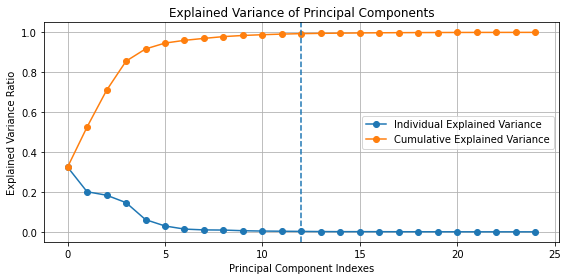

In [30]:
pc = len(X_train_norm.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.savefig("images/PCACumulative.svg")
plt.tight_layout()
plt.axvline(12, 0, ls='--')
plt.show()

In [31]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]

PC1     PC2     PC3     PC4     PC5     PC6  \
Cumulative Explained Variance  32.46%  52.56%  70.93%  85.57%  91.69%  94.63%   

                                  PC7     PC8     PC9    PC10    PC11    PC12  \
Cumulative Explained Variance  96.01%  96.98%  97.88%  98.44%  98.84%  99.14%   

                                 PC13    PC14    PC15  
Cumulative Explained Variance  99.36%  99.51%  99.61%

Les r√©sultats pr√©sent√©s dans le graphique ci-dessus sont remarquables : les 5 premi√®res composantes principales capturent √† elles seules plus de 90‚ÄØ% de la variance totale. Pour notre √©tude, nous choisissons toutefois de conserver les 12 premi√®res composantes principales, ce qui permet d‚Äôexpliquer plus de 99‚ÄØ% de la variance, tout en divisant par deux le nombre de variables initiales.

Le mod√®le de PCA (Analyse en Composantes Principales) est ajust√© uniquement sur le jeu d'entra√Ænement, afin d‚Äô√©viter toute fuite d'information provenant du jeu de test. Ensuite, les donn√©es de test sont projet√©es dans le sous-espace d√©fini par les 12 premi√®res composantes, calcul√©es √† partir de la matrice de covariance du jeu d‚Äôentra√Ænement uniquement. Cela garantit une s√©paration rigoureuse entre apprentissage et √©valuation.

In [32]:
pc = 12
pca = PCA(n_components=pc)
pca.fit(X_train_norm)
X_train = pd.DataFrame(pca.transform(X_train_norm))
X_test = pd.DataFrame(pca.transform(X_test_norm))
X_train.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_test.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.541856 -0.551393 -0.412480  0.122101  0.238448  0.715080 -0.118730   
1 -0.499287 -0.532587 -0.456984  0.088489 -0.464270  0.046294 -0.005356   
2  0.832777 -0.331479 -0.471075 -0.018672  0.173999  0.077012 -0.117121   
3  0.863633 -0.282837 -0.492387 -0.059972 -0.293545 -0.108782  0.099432   
4 -0.474527 -0.631709  0.548848  0.022170 -0.370284  0.012118  0.082537   

        PC8       PC9      PC10      PC11      PC12  
0 -0.217807  0.089929  0.010003 -0.012406 -0.002596  
1 -0.012562  0.043945  0.027395  0.004628  0.006394  
2 -0.145521 -0.023793  0.052872  0.009305 -0.071040  
3 -0.142524  0.090122  0.036494  0.002218  0.010245  
4 -0.129728 -0.140121 -0.031074  0.067107  0.071883

<a id='imbalance'></a>
## 3.5 Gestion du D√©s√©quilibre de Classes
Comme montr√© en 2.3, notre jeu de donn√©es pr√©sente un d√©s√©quilibre de classes, avec une sur-repr√©sentation des exemples non-d√©faillants. Ce type de d√©s√©quilibre est fr√©quent dans les donn√©es r√©elles, notamment dans les contextes de d√©tection d‚Äô√©v√©nements rares (comme le d√©faut de paiement, la fraude ou les maladies rares).

Ce d√©s√©quilibre peut biaiser les mod√®les pr√©dictifs en les incitant √† privil√©gier la classe majoritaire, au d√©triment de la classe minoritaire, souvent celle d‚Äôint√©r√™t. Il est donc essentiel de mettre en place des strat√©gies pour corriger ce d√©s√©quilibre, comme le r√©√©chantillonnage (oversampling ou undersampling), l‚Äôutilisation de m√©triques adapt√©es (F1-score, AUC, etc.), ou encore le recours √† des algorithmes robustes au d√©s√©quilibre.

In [33]:
class_count = [y_train[y_train == 0].count(), y_train[y_train == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion')
class_count_df

Training set class proportion


Number Percentage
Non-defaulters   17246     77.68%
Defaulters        4954     22.32%

### 3.5.1 Cluster Centroid Undersampling
L‚Äôundersampling al√©atoire peut entra√Æner une perte d‚Äôinformation critique. Pour y rem√©dier, nous utilisons la m√©thode Cluster Centroids 
7, qui remplace les √©chantillons majoritaires par les centro√Ødes de clusters form√©s via K-means. Le nombre de clusters est fix√© au nombre d‚Äôexemples de la classe minoritaire. Cette m√©thode permet de conserver les variations les plus repr√©sentatives de la classe majoritaire tout en √©quilibrant les classes 
8..<br><br>


<figure>
    <img src="images/cluster_centroids.png" alt="Cluster Centroid Undersampling" style="width: 35em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 3.2 - Cluster Centroid Undersampling <a href='#cc_img'>[9]</a >.</figcaption>
</figure>

Dans le tableau ci-dessous, nous pr√©sentons le r√©sultat du sous-√©chantillonnage. Le jeu de donn√©es d'apprentissage est d√©sormais √©quilibr√© et le nombre de *non-d√©faillants* est √©gal au nombre de *d√©faillants*..

In [34]:
oversample = ClusterCentroids(random_state=24)
X_train_cc, y_train_cc = oversample.fit_resample(X_train, y_train)

In [35]:
class_count = [y_train_cc[y_train_cc == 0].count(), y_train_cc[y_train_cc == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after Cluster Centroid Undersampling')
class_count_df

# non-defaulters 4954
# defaulters 4954

Training set class proportion after Cluster Centroid Undersampling


Number Percentage
Non-defaulters    4954     50.00%
Defaulters        4954     50.00%

### 3.5.2 Technique de sur√©chantillonnage synth√©tique des minorit√©s
La technique de sur√©chantillonnage synth√©tique des minorit√©s (SMOTE) a √©t√© propos√©e dans [\[10\]](#smote) pour √©viter le risque de surapprentissage li√© au sur√©chantillonnage al√©atoire. Au lieu de simplement r√©pliquer des observations existantes, cette technique g√©n√®re des √©chantillons artificiels. Comme le montre la figure 3.3, cela est r√©alis√© en interpolant lin√©airement une observation minoritaire s√©lectionn√©e al√©atoirement et l'une de ses observations minoritaires voisines. Plus pr√©cis√©ment, SMOTE ex√©cute trois √©tapes pour g√©n√©rer un √©chantillon synth√©tique.

1. Tout d'abord, elle choisit une observation minoritaire al√©atoire $\vec{a$.

2. Parmi ses $k$ plus proches voisins de classe minoritaire, l'instance $\vec{b}$ est s√©lectionn√©e. 3. Enfin, un nouvel √©chantillon $\vec{x}$ est cr√©√© en interpolant al√©atoirement les deux √©chantillons : $\vec{x}=\vec{a}+w\times(\vec{b}-\vec{a})$, o√π $w$ est un poids al√©atoire dans $[0,1]$.


<figure>
    <img src="images/smote1.png" alt="SMOTE interpolation" style="width: 55em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 3.3 - SMOTE linearly interpolates a randomly selected minority sample and one of its <i>k = 4</i> nearest neighbors <a href='#k-means-smote'>[11]</a >.</figcaption>
</figuDans le dataframe ci-dessous, nous pr√©sentons le r√©sultat du sur√©chantillonnage SMOTE. L'ensemble d'apprentissage est d√©sormais √©quilibr√© et le nombre de *d√©faillants* est √©gal au nombre de *non-d√©faillants*.ers*.

In [36]:
oversample = SMOTE(random_state=24)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [37]:
class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after SMOTE Oversampling')
class_count_df

# non-defaulters 17246
# defaulters 17246

Training set class proportion after SMOTE Oversampling


Number Percentage
Non-defaulters   17246     50.00%
Defaulters       17246     50.00%

Cependant, l'algorithme pr√©sente quelques faiblesses li√©es au d√©s√©quilibre et au bruit, comme l'illustre la figure 3.4. √âtant donn√© que SMOTE choisit al√©atoirement une instance minoritaire √† sur√©chantillonner avec une probabilit√© uniforme, les zones minoritaires dens√©ment peupl√©es sont tr√®s susceptibles d'√™tre encore plus gonfl√©es, tandis que les zones minoritaires peu peupl√©es restent clairsem√©es. Un autre probl√®me majeur est que SMOTE est susceptible de g√©n√©rer du bruit. Cela se produit car l'algorithme ne reconna√Æt pas les √©chantillons minoritaires bruyants, qui sont situ√©s parmi les instances de classe majoritaires, et les interpole n√©anmoins avec leur plus proche voisin minoritaire. Enfin, l'algorithme n'applique pas sp√©cifiquement la limite de d√©cision, alors qu'il a √©t√© avanc√© que les classificateurs pourraient b√©n√©ficier de la g√©n√©ration d'√©chantillons plus proches de la limite de classe.


<figure>
    <img src="images/smote2.jpg" alt="SMOTE weaknesses" style="width: 40em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 3.4 - Behavior of SMOTE in the presence of noise and within-class imbalance <a href='#k-means-smote'>[11]</a >.</figcaption>
</figure>

### 3.5.3 K-means SMOTE
La m√©thode propos√©e dans [\[11\]](#k-means-smote) utilise l'algorithme de clustering K-means, simple et populaire, associ√© au sur√©chantillonnage SMOTE afin de r√©√©quilibrer les jeux de donn√©es asym√©triques. Elle √©vite la g√©n√©ration de bruit en sur√©chantillonnant uniquement les zones s√ªres (c'est-√†-dire celles compos√©es d'au moins 50 % d'√©chantillons minoritaires). De plus, elle se concentre sur les d√©s√©quilibres inter-classes et intra-classes, s'attaquant au probl√®me des petites disjonctions en gonflant les zones minoritaires clairsem√©es.

K-means SMOTE se compose de trois √©tapes : clustering, filtrage et sur√©chantillonnage.
1. Lors de l'√©tape de clustering, l'espace d'entr√©e est clusteris√© en $k$ groupes √† l'aide du clustering K-means.
2. L'√©tape de filtrage s√©lectionne les clusters √† sur√©chantillonner, en conservant ceux pr√©sentant une forte proportion d'√©chantillons minoritaires. Il distribue ensuite le nombre d'√©chantillons synth√©tiques √† g√©n√©rer, en attribuant davantage d'√©chantillons aux clusters o√π les √©chantillons minoritaires sont peu distribu√©s.
3. Enfin, dans l'√©tape de sur√©chantillonnage, SMOTE est appliqu√© dans chaque cluster s√©lectionn√© pour atteindre le ratio cible d'instances minoritaires et majoritaires.


<figure>
    <img src="images/smote3.png" alt="K-means SMOTE algorithm" style="width: 45em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 3.5 - K-means SMOTE oversamples safe areas and combats within-class imbalance <a href='#k-means-smote'>[11]</a >.</figcaption>
</figDans le dataframe ci-dessous, nous pr√©sentons le r√©sultat du sur√©chantillonnage SMOTE K-means. L'ensemble d'apprentissage est d√©sormais √©quilibr√© et le nombre de d√©faillants est √©gal au nombre de non-d√©faillants.ters*.

In [38]:
oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)
X_train_ksmote, y_train_ksmote = oversample.fit_resample(X_train, y_train)

In [39]:
class_count = [y_train_ksmote[y_train_ksmote == 0].count(), y_train_ksmote[y_train_ksmote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after K-means SMOTE Oversampling')
class_count_df

Training set class proportion after K-means SMOTE Oversampling


Number Percentage
Non-defaulters   17246     49.99%
Defaulters       17252     50.01%

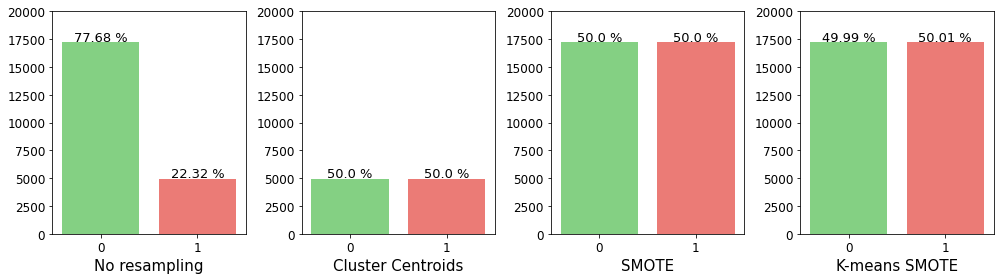

In [40]:
y_list = [y_train, y_train_cc, y_train_smote, y_train_ksmote]
y_list_labels = ['No resampling', 'Cluster Centroids', 'SMOTE', 'K-means SMOTE']

plt.figure(figsize=(14,4))

i = 1
for value, label in zip(y_list,y_list_labels):    
    plt.subplot(1,4,i)
    graph_target = sns.countplot(value, palette=['#77DD76','#FF6962']) 
    plt.xlabel(label, fontdict= {"size":15})
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    j=0
    for p in graph_target.patches:
        height = p.get_height()

        str_plot = f'{round(100 * value.value_counts()[j]/len(value),2)} %'

        graph_target.text(p.get_x()+p.get_width()/2., height + 100 , str_plot, ha="center", fontsize = 13)
        j += 1
        
    i += 1
    graph_target.set_ylim(0, 20000) 

plt.tight_layout()
plt.savefig('images/resamplingDataset.svg')
plt.show()

<a id='method'></a>
# 4. Model Evaluation Methodology
<a id='validation'></a>
## 4.1 Validation
One of the key steps in building a machine learning model is to estimate its performance on data that the model has not seen before. For this reason, in [3.2](#train-test) we have split our initial dataset into separate training and test datasets. The former will be used for model training, and the latter to estimate its generalization performance. This approach is commonly known as **holdout** method.

However, in typical machine learning applications, we are also interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. But, if
we reuse the same test dataset over and over again during this process, it will become part of our training data and thus the model will be more likely to overfit. A validation set could be held out of the training set, to evaluate on it the performance of the model. However, this is not recommended because performance estimation may be sensitive to how we partition the training set.

### 4.1.1 K-Fold Cross-Validation
Instead of holdout, a more robust technique for model tuning is **k-fold cross-validation**, where we repeat the holdout method $k$ times on $k$ subsets of the training data. In particular, we randomly split the training dataset into $k$ folds without replacement, where $k‚Äì1$ folds are used for the model training, and one fold is used for performance evaluation. We then calculate the average performance of the models based on the different independent test folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method.


<figure>
    <img src="images/k-fold-cv.png" alt="10-fold Cross Validation" style="width: 40em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 4.1 - Example of k-fold cross-validation with <i>k = 10</i> <a href='#raschka'>[4]</a >.</figcaption>
</figure>

Once we have found satisfactory hyperparameter values, we can retrain the model on the complete training dataset and obtain a final performance estimate using the independent test dataset. The rationale behind fitting a model to the whole training dataset after k-fold cross-validation is that providing more training examples to a learning algorithm usually results in a more accurate and robust model.

Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that each example will be used for training and validation (as part of a test fold) exactly once, which yields a lower-variance estimate of the model performance than the holdout method.

A good standard value for $k$ in k-fold cross-validation is $10$ [\[12\]](#cv10). However, since we are working with a large dataset, we can choose a smaller value for $k$, for example $k=5$, and still obtain an accurate estimate of the average performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds.

As before, stratification is applied to ensure that each fold is representative of the class proportions in the training dataset.

<a id='metrics'></a>
## 4.2 Performance Evaluation Metrics
Classification assessment metrics compare the true class membership of each observation with the prediction of the classifier. To illustrate the alignment of binary predictions with the true distribution, a **confusion matrix** can be constructed.

|            | Predicted Negative | Predicted Positive |
|:----------:|:-------------:|:-------------:|
| **Actual Negative** |       TN      |       FP      |
| **Actual Positive** |       FN      |       TP      |

The following terminology is often used when referring to the counts tabulated in a confusion matrix:
- True positive (TP), which corresponds to the number of positive examples correctly predicted by the classification model.
- False negative (FN), which corresponds to the number of positive examples wrongly predicted as negative by the classification model.
- False positive (FP), which corresponds to the number of negative examples wrongly predicted as positive by the classification model.
- True negative (TN), which corresponds to the number of negative examples correctly predicted by the classification model.

Predictive **accuracy** is the performance measure generally associated with machine learning algorithms and is defined as:

$$\text{Accuracy} = \frac{TP+TN}{TP+FP+TN+FN} \tag{4.1}$$

Since the accuracy measure treats every class as equally important, it may
not be suitable for analyzing imbalanced data sets, where the rare class is considered more interesting than the majority class [\[13\]](#tan2016).

**Precision** and **recall** are two widely used class-specific metrics employed in applications where successful detection of one of the classes is considered more significant than detection of the other class.

$$\text{Precision, }p = \frac{TP}{TP+FP} \tag{4.2}$$

$$\text{Recall, }r = \frac{TP}{TP+FN} \tag{4.3}$$

- Precision indicates how many of the positive predictions are correct. The higher the precision is, the lower the number of false positive errors committed by the classifier.
- Recall measures how many positive instances are correctly classified as such. Classifiers with large recall have very few positive examples misclassified as the negative class.

Building a model that maximizes both precision and recall is the key challenge of classification algorithms. Hence, these two metrics are usually summarized into another metric known as the F1-score.

$$\text{F1-score}=\frac{2}{\frac{1}{r}+\frac{1}{p}}=\frac{2rp}{r+p} \tag{4.4}$$

In principle, F1 represents a harmonic mean between recall and precision, and tends to be closer to the smaller of the two numbers. Hence, a high value ensures that both precision and recall are reasonably high.

### 4.2.1 Precision-Recall Curve
In a classification problem, we may decide to predict the class values directly, or the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the *threshold* for how to interpret the predicted probabilities. For example, a default might be to use a threshold of $0.5$, meaning that a probability in $[0.0, 0.49]$ is a negative outcome, and a probability in $[0.5, 1.0]$ is a positive outcome. This threshold can be adjusted to tune the behavior of the model for a specific problem. An example would be to reduce more of one or another type of error.

A *precision-recall* (PR) curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds. We use it to explore the trade-off between the well-classified positive examples and the number of misclassified negative examples.

<figure>
    <img src="images/pr_curve.png" alt="Precision-Recall Curve" style="width: 25em;">
    <figcaption style='text-align:center; font-size: 0.8em;'>Fig. 4.2 - Precision-Recall Curve Plot.</figcaption>
</figure>

Together with the PR curve, we also plot a horizontal line with the value of the ratio of positive cases in the dataset. It indicates the performance of a *no-skill classifier*, i.e., one that predict a random class in all cases. A model with perfect skill is depicted as a point at $(1,1)$. A skilful model is represented by a curve that bows towards $(1,1)$ above the flat line of no skill.

Besides, the area under the PR curve (AUC) is a good way to get a score for the general performance of a classifier and to compare it to that of another classifier [\[14\]](#ch8). Noting that the PR space is a unit square, it can be clearly seen that the AUC for a classifier $f$ is such that $\operatorname{AUC}(f)\in[0,1]$, with the upper bound attained for a perfect classifier (one with $p=1$ and $r=1$).

<a id='models'></a>
# 5. Classification Models
In this section, we present different supervised learning algorithms with their mathematical details, and we use them on our dataset to build a classification model that is able to predict credit card defaults in the next month.

<a id='logistic'></a>
## 5.1 Logistic Regression
### 5.1.1 Introduction to Generalized Linear Models
Generalized Linear Models (GLM) are a broad class of models that provide a unifying framework for many commonly used statistical techniques, such as the linear regression. They are characterized by the following three components [\[15\]](#agresti).
- The *random component* identifies the response variable $Y$ and assumes a probability distribution for it. Standard GLMs treat the $m$ observations on $Y$ as independent, and we denote those observations by $(y_1,..., y_m)$.
- The *linear predictor* specifies the explanatory variables. The name reflects that the variables enter linearly as predictors on the right-hand side of the model equation, in the form
$$\beta_0+\beta_1 x_1+...+\beta_n x_n=\mathbf{x}^\top\mathbf{\beta}$$
- The *link function* specifies a function of $\mathbb{E}[Y]$ that the GLM relates to the linear predictor.

Hence, in a GLM the expected response for a given feature vector
$\mathbf{x}=[x_1,...,x_n]^\top$ is of the form

$$\mathbb{E}[Y|X=\mathbf{x}]=h(\mathbf{x}^\top\mathbf{\beta})\tag{5.1}$$

for some *activation function* $h$, which is the inverse of the link function [\[16\]](#kroese).

### 5.1.2 The Logistic Model
In our case, the response `DEFAULT` falls into one of two categories, $\text{Yes}=1, \text{No}=0$, thus we assume a Bernoulli distribution for $Y$. Rather than modeling this response $Y$ directly, *logistic regression* models the probability that $Y$ belongs to a particular category using the *logistic function* as activation function $h$

$$P(Y_i=1|X=\mathbf{x}_i)=h(\mathbf{x}_i^\top\mathbf{\beta})=\frac{e^{\mathbf{x}_i^\top\mathbf{\beta}}}{1+e^{\mathbf{x}_i^\top\mathbf{\beta}}} \label{logistic_function}\tag{5.2}$$

To fit the model (\ref{logistic_function}), we use in the next section the *maximum likelihood* method. Large values of $\mathbf{x}_i^\top\mathbf{\beta}$ lead to a high probability that $Y_i=1$, and small values of $\mathbf{x}_i^\top\mathbf{\beta}$ cause $Y_i$ to be $0$ with high probability. The logistic function will always produce an S-shaped curve of the form depicted in Figure 5.1 (right), and so regardless of the value of $X$, we will obtain a sensible prediction.<br><br>

<figure>
    <img src="images/logistic.png" alt="Logistic Regression" style="width: 45em;">
    <figcaption style='text-align:center; font-size: 0.8em;' size>Fig. 5.1 - Classification on a simulated dataset. Left: estimated probability of default using linear regression. Some estimated probabilities are negative! The orange ticks indicate the 0/1 values coded for default (No or Yes). Right: Predicted probabilities of default using logistic regression. All probabilities lie between 0 and 1 <a href='#james'>[17]</a>.</figcaption>
</figure>

After a bit of manipulation of (\ref{logistic_function}), we find that

$$\frac{P(Y_i=1|X=\mathbf{x}_i)}{1-P(Y_i=1|X=\mathbf{x}_i)}=e^{\mathbf{x}_i^\top\mathbf{\beta}} \label{odds}\tag{5.3}$$

where the left-hand side is called the *odds*, and can take on any value between $0$ and $\infty$. By taking the logarithm of both sides of (\ref{odds}), we see that the logistic regression model (\ref{logistic_function}) has a *logit* that is linear in $X$

$$\log{\Bigg(\frac{P(Y_i=1|X=\mathbf{x}_i)}{1-P(Y_i=1|X=\mathbf{x}_i)}\Bigg)}=\mathbf{x}_i^\top\mathbf{\beta} \label{logit}\tag{5.4}$$

### 5.1.3 Estimating the Regression Coefficients
The coefficient vector $\mathbf{\beta}=[\beta_1,...,\beta_n]^\top$ is unknown, and must be estimated based on the available training data. We use the maximum likelihood method to find $\hat{\beta}$ such that, plugging this estimate into the model given in (\ref{logistic_function}), yields a number close to one for all individuals who defaulted, and a number close to zero for all individuals who did not. This intuition can be formalized using the *likelihood function*:

$$\mathcal{L}(\mathbf{\beta})=\prod_{i=1}^{m}{[h(\mathbf{x}_i^\top\mathbf{\beta})]^{y_i}[1-h(\mathbf{x}_i^\top\mathbf{\beta})]^{1-y_i}} \label{likelihood}\tag{5.5}$$

Maximizing the log-likelihood $\log{\mathcal{L}(\mathbf{\beta})}$ with respect to $\mathbf{\beta}$ gives the maximum likelihood estimator of $\mathbf{\beta}$. In a supervised learning framework, this is equivalent to minimizing:

$$-\frac{1}{m}\log{\mathcal{L}(\mathbf{\beta})}=-\frac{1}{m}\sum_{i=1}^{m}{[y_i\log{h(\mathbf{x}_i^\top\mathbf{\beta})}+(1-y_i)\log{(1-h(\mathbf{x}_i^\top\mathbf{\beta}))}]} \label{cross-entropy}\tag{5.6}$$

Notice that we can interpret (\ref{cross-entropy}) as the *binary cross-entropy training loss* associated with comparing a true conditional probability density function (pdf) with an approximated pdf. 

Minimizing (\ref{cross-entropy}) in terms of $\mathbf{\beta}$ actually constitutes a *convex* optimization problem, which can be solved computing the gradient and the Hessian of (\ref{cross-entropy}) and then applying an iterative process, like the Newton's method.

<a id='logistic-selection'></a>
### 5.1.4 Model Selection
In our study, we use the logistic regression model featured in the *Scikit-learn* library [\[18\]](#sklearn). Here, $\mathscr{l}_2$ regularization is applied by default, which is common in machine learning but not in statistics. 

$$\frac{\lambda}{2}\mathbf{\beta}^\top\mathbf{\beta} \label{l2}\tag{5.6}$$

Adding a regularization term to the cost function allows us to tune the complexity of the model, as it penalizes extreme weight values during model training. Via the regularization parameter, $\lambda$, we can then control how well we fit the training data, while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength.

The `LogisticRegression` class in Scikit-learn implements the parameter `C` as the inverse of the regularization term $\lambda$. Consequently, we can specify a stronger regularization by adopting smaller values of `C`.

Therefore, we perform cross-validated grid-search over the following parameter grid to find the best configuration for our logistic regression model to use to predict the test set.

```python
params = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
```

In [41]:
# Plots a barchart with the F1 results and a confusion matrix on the best estimator with the best preprocessing technique
def plot_summary(result, resampling_names, y_pred, y_test):
    
    fig = plt.figure(constrained_layout=False,figsize=(14,4))
    gs1 = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5, hspace=0.5)
    ax1 = fig.add_subplot(gs1[0,0:3])
    ax2 = fig.add_subplot(gs1[0,3:5])
    
    plot_x = []
    plot_y = []
    
    for i in range(len(result)):
        plot_x.append(result[i])
        plot_y.append(resampling_names[i])

    temp_df = pd.DataFrame({'x':plot_x, 'y':plot_y}).sort_values(['x'], ascending=False)
    
    # plot barchart
    sns.barplot(data=temp_df, x='x',y='y', 
                palette='Greens_r',
                ax=ax1)
    ax1.set_xlabel("F1-score", fontsize="14")
    ax1.set_ylabel("")
    ax1.set_yticklabels(temp_df.y,fontsize=13)
    
    # confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, 
                cmap=plt.cm.Greens, 
                annot_kws={"size": 14},
                linecolor = 'w',
                linewidth = 4,ax=ax2,
                fmt='d'
               )
    
    ax2.set_xlabel("Predicted labels",fontsize="14")
    ax2.set_ylabel("True labels",fontsize="14")
    
    return plt


def plot_test_scores(model, oversample, plot):
    
    if oversample == 'raw':
        X_test_s = X_test_norm.copy()
    else:
        X_test_s = X_test.copy()
    
    # predict
    y_pred = model.predict(X_test_s)
    
    # various tests
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)
    
    #print on console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")
    
    #plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15,4))
        
        tmp = pd.DataFrame({'Feature': X_test_s.columns, 
                            'Feature importance': model.best_estimator_.feature_importances_})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[2])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[2].legend(loc = 'upper right')
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[1])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[1].legend(loc = 'upper right')
        plt.show()
    
    return test_acc, test_recall, test_precision, test_f1, test_auc


def pipeline(model, params, oversample=None, plot=False):
    
    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0
    
    if oversample:
        if oversample == 'raw': #without PCA
            X_train_s = X_train_norm.copy() #original data scaled
            y_train_s = y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s = X_train.copy() #with PCA without resampling
        y_train_s = y_train.copy()
        X_test_f1 = X_test.copy()
    
    #gridsearch best parameter
    gridsearch = GridSearchCV(estimator = model,
                      param_grid = params,
                      scoring = 'f1',
                      cv = 5, 
                      n_jobs = -1,
                      verbose = True)
    gridsearch.fit(X_train_s, y_train_s)
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")
    
    test_scores = plot_test_scores(gridsearch, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_
    
    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred),2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1
    
    return test_scores, y_pred_max, y_test_max

In [42]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_lr = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Logistic Regression with Raw data
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.27946732816436864
Test Scores:
- Accuracy:	0.8048912309147412
- Recall:	0.19624470018170806
- Precision:	0.7346938775510204
- F1-score:	0.30975143403441685
- AUC:		0.5551193361572708


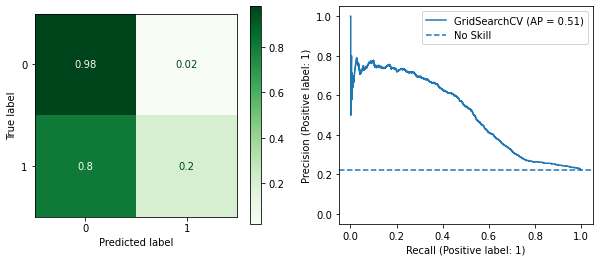

Logistic Regression with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.27924371052935976
Test Scores:
- Accuracy:	0.8042156465342521
- Recall:	0.19200484554815264
- Precision:	0.7337962962962963
- F1-score:	0.3043686989918387
- AUC:		0.5530235272794735


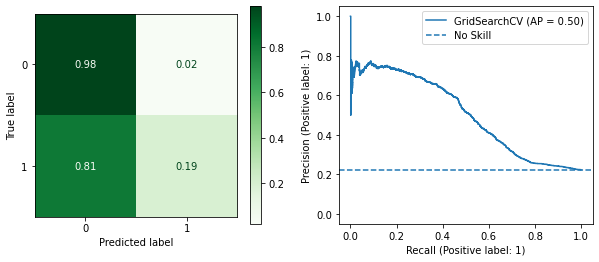

Logistic Regression with PCA + SMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 1.0}
Best validation score:	0.663015565520895
Test Scores:
- Accuracy:	0.6319416295095257
- Recall:	0.6795881284070261
- Precision:	0.3382574615616521
- F1-score:	0.45169082125603865
- AUC:		0.5446612087122137


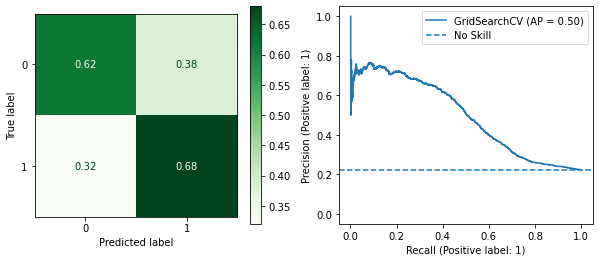

Logistic Regression with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 10.0}
Best validation score:	0.7325059123562209
Test Scores:
- Accuracy:	0.7247669233887313
- Recall:	0.3634161114476075
- Precision:	0.37831021437578816
- F1-score:	0.3707136237256719
- AUC:		0.44186708130110464


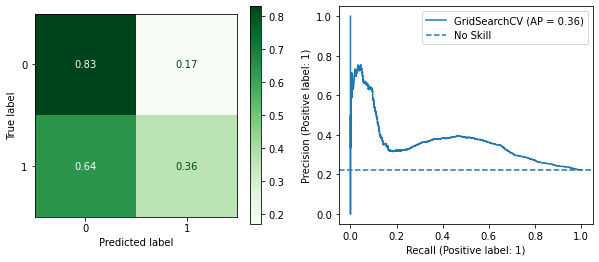

Logistic Regression with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 10.0}
Best validation score:	0.6527932511996625
Test Scores:
- Accuracy:	0.5977570598567761
- Recall:	0.6662628709872804
- Precision:	0.31196823596142936
- F1-score:	0.4249565385358316
- AUC:		0.5263402528393056


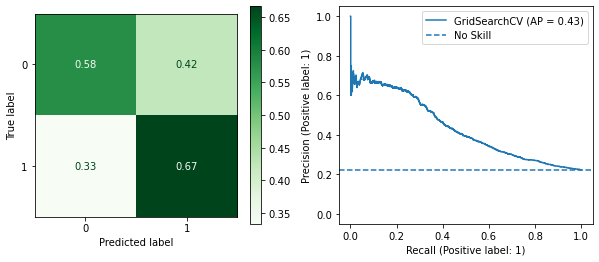

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.804891  0.196245   0.734694  0.309751   
PCA                                  0.804216  0.192005   0.733796  0.304369   
PCA + SMOTE oversampling             0.631942  0.679588   0.338257  0.451691   
PCA + KMeansSMOTE oversampling       0.724767  0.363416   0.378310  0.370714   
PCA + ClusterCentroids oversampling  0.597757  0.666263   0.311968  0.424957   

                                          AUC  
Raw data                             0.555119  
PCA                                  0.553024  
PCA + SMOTE oversampling             0.544661  
PCA + KMeansSMOTE oversampling       0.441867  
PCA + ClusterCentroids oversampling  0.526340

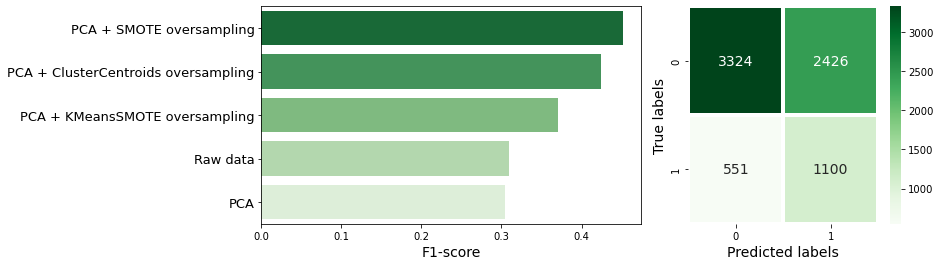

In [43]:
params_lr = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
for idx, oversample in enumerate(oversample_method):
    print(f"Logistic Regression with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = pipeline(LogisticRegression(random_state=24, max_iter=1000, n_jobs=-1),
                                              params_lr,
                                              oversample)
    scores_lr['Accuracy'][idx] = scores[0]
    scores_lr['Recall'][idx] = scores[1]
    scores_lr['Precision'][idx] = scores[2]
    scores_lr['F1-score'][idx] = scores[3]
    scores_lr['AUC'][idx] = scores[4]
    
scores_lr_df = pd.DataFrame(data=scores_lr, index=oversample_names)
plot = plot_summary(scores_lr_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryLogReg.svg")
scores_lr_df

The dataframe above summarizes the Logistic Regression results on the test set, obtained by experimenting with different pre-processing techniques fitted on the training set. PCA allows us to achieve the same performance as using all the data, but with half the features. Notice that not using any oversampling method leads to the highest accuracy and AUC, but results in a lower F1-score. The original SMOTE outperforms both Cluster Centroid and the novel K-means SMOTE.

In the graphs we can see a steep drop at the beginning of the PR curves. This is due to the fact that the threshold is particularly high there, so there are few TPs and FPs to calculate the precision and even a single mis-classification can lead to a large shift.

<a id='svm'></a>
## 5.2 Support Vector Machine
Support Vector Machines (SVMs) are considered one of the most theoretically well motivated and practically most effective classification algorithms in modern machine learning [\[19\]](#mohri). As supervised learning methods, they solve the optimization problem of finding the hyperplane that maximizes the margin between two classes in the feature space.
### 5.2.1 Hard Margin SVM
A hyperplane in a space $\mathcal{H}$ endowed with a dot product $\langle\cdot,\cdot\rangle$ is described by the set

$$\{\mathbf{x}\in\mathcal{H}|\langle\mathbf{w},\mathbf{x}\rangle+b=0\} \label{hyperplane}\tag{5.7}$$

where $\mathbf{w}\in\mathcal{H}$ and $b\in\mathbb{R}$. Such a hyperplane naturally divides $\mathcal{H}$ into two half-spaces: $\{\mathbf{x}\in\mathcal{H}|\langle\mathbf{w},\mathbf{x}\rangle+b\geq0\}$ and $\{\mathbf{x}\in\mathcal{H}|\langle\mathbf{w},\mathbf{x}\rangle+b<0\}$, and hence can be used as the decision boundary of a binary classifier.

Given a set $\mathcal{X}=[\mathbf{x}_1,...,\mathbf{x}_m]$, the margin is the distance of the closest point in $\mathcal{X}$ to the hyperplane (\ref{hyperplane}):

$$\underset{i=1,...,m}{\operatorname{min}}{\frac{|\langle\mathbf{w},\mathbf{x}_i\rangle+b|}{\|\mathbf{w}\|}}$$

Since the parametrization of the hyperplane (\ref{hyperplane}) is not unique, we set

$$\underset{i=1,...,m}{\operatorname{min}}{|\langle\mathbf{w},\mathbf{x}_i\rangle+b|}=1$$

and the margin simply becomes $1/\|\mathbf{w}\|$.<br><br>

<figure>
    <img src="images/svm-hard.png" alt="Hard Margin Hyperplane" style="width: 22em;">
    <figcaption style='text-align:center; font-size: 0.8em;' size>Fig. 5.2 - Maximum Margin Hyperplane <a href='#mohri'>[19]</a>.</figcaption>
</figure>

Let $S=[(\mathbf{x}_1, y_1),...,(\mathbf{x}_m, y_m)]$ be a training set of examples, where each $\mathbf{x}_i\in\mathcal{H}$ and $y_i\in\{\pm1\}$.
Our aim is to find a linear decision boundary parameterized by $(\mathbf{w}, b)$ such that $\langle\mathbf{w},\mathbf{x}_i\rangle+b\geq0$ whenever $y_i=+1$ and $\langle\mathbf{w},\mathbf{x}_i\rangle+b<0$ whenever $y_i=-1$. The SVM solution is the separating hyperplane with the maximum geometric margin, as it is the *safest* choice. The problem of maximizing the margin can be written as:

$$\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\operatorname{min}} &&\frac{1}{2}\|\mathbf{w}\|^2\\
&\text{s.t.} && y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b)\geq1 &\forall i
\end{aligned}\label{hard}\tag{5.8}
\end{equation}$$

In deriving (\ref{hard}), we implicitly assumed that the data is linearly separable, that is, there is a hyperplane which correctly classifies the training data. Such a classifier is called a *hard margin classifier*.

### 5.3.2 Soft Margin SVM
The Hard-SVM formulation assumes that the training set is linearly separable, which is a rather strong assumption. If the data are not linearly separable, then (\ref{hard}) does not have a solution. 

To deal with this situation, we present the Soft-SVM formulation, which allows the violation of the constraint for some examples in the training set. This can be modeled by introducing non-negative slack variables $\xi_1,...,\xi_m$, which measure how much the constraint $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b)\geq1$ is being violated.<br><br>

<figure>
    <img src="images/svm-soft.png" alt="Soft Margin Hyperplane" style="width: 22em;">
    <figcaption style='text-align:center; font-size: 0.8em;' size>Fig. 5.3 - A separating hyperplane with point $\mathbf{x}_i$ classified incorrectly and point $\mathbf{x}_j$ correctly classified, but
with margin less than 1. <a href='#mohri'>[19]</a>.</figcaption>
</figure>

The optimization problem is to jointly minimize the norm of $\mathbf{w}$ (corresponding to the margin) and the average of $\xi_i$ (corresponding to the violations of the constraints):

$$\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b,\mathbf{\xi}}{\operatorname{min}} &&\frac{1}{2}\|\mathbf{w}\|^2 + \frac{C}{m}\sum_{i=1}^{m}{\xi_i}\\
&\text{s.t.} && y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b)\geq 1-\xi_i, \\ &&& \xi_i\geq 0 &\forall i
\end{aligned}\label{soft}\tag{5.9}
\end{equation}$$

where $C$ is a penalty parameter, typically determined via k-fold cross validation as in logistic regression ([5.1.4](#logistic-selection)). The resultant classifier is said to be a *soft margin classifier*.

A closer examination of (\ref{soft}) reveals that:
- $\xi_i=0$ whenever $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b)>1$,
- $\xi_i=1-y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b)$ whenever $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b)<1$.

In short, $\xi_i=\max{(0, 1-y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))}$. Using this observation one can eliminate $\xi_i$ from (\ref{soft}), and write it as the following unconstrained optimization problem:

$$\underset{\mathbf{w},b}{\operatorname{min}}\frac{1}{2}\|\mathbf{w}\|^2 + \frac{C}{m}\sum_{i=1}^{m}{\max{(0, 1-y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))}} \label{soft-uncostrained}\tag{5.10}$$

This shows that such a classifier is nothing but a regularized risk minimizer. Here the regularizer is the square norm of the decision hyperplane, $\frac{1}{2}\|\mathbf{w}\|^2$, and the loss function  is the so-called *binary hinge loss*.

### 5.2.3 Dual Problem
By introducing non-negative Lagrange multipliers $\alpha_i$ and $\beta_i$, we can write the Lagrangian:

$$L(\mathbf{w},b,\mathbf{\xi},\mathbf{\alpha},\mathbf{\beta})=\frac{1}{2}\|\mathbf{w}\|^2 + \frac{C}{m}\sum_{i=1}^{m}{\xi_i}-\sum_{i=1}^{m}{\alpha_i[y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))-1+\xi_i]}-\sum_{i=1}^{m}{\beta_i\xi_i} \label{lagrangian}\tag{5.11}$$

The KKT conditions are obtained by setting the gradient of the Lagrangian with respect to the primal variables $\mathbf{w}$, $b$, and $\xi_i$s to zero and by writing the complementarity conditions:

$$\begin{equation}
\begin{aligned}
&\nabla_{\mathbf{w}}L = \mathbf{w}-\sum_{i=1}^{m}{\alpha_i y_i \mathbf{x}_i} =0 && \Longrightarrow \mathbf{w}=\sum_{i=1}^{m}{\alpha_i y_i \mathbf{x}_i}\\
&\nabla_{b}L = -\sum_{i=1}^{m}{\alpha_i y_i} =0 && \Longrightarrow \sum_{i=1}^{m}{\alpha_i y_i}=0\\
&\nabla_{\mathbf{\xi}_i}L = C-\alpha_i-\beta_i=0 && \Longrightarrow \alpha_i+\beta_i=C
\end{aligned}\label{KKT}\tag{5.12}
\end{equation}$$

$$\begin{equation}
\begin{aligned}
&\alpha_i[y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))-1+\xi_i]=0 && \forall i
\end{aligned}\label{KKT1}\tag{5.13}
\end{equation}$$
$$\begin{equation}
\begin{aligned}
&\beta_i\xi_i && \forall i
\end{aligned}\label{KKT2}\tag{5.14}
\end{equation}$$

Notice that the KKT conditions generate three cases for $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))$.

<figure>
    <img src="images/svm-cases.png" alt="SVM points" style="width: 32em;">
    <figcaption style='text-align:center; font-size: 0.8em;' size>Fig. 5.4 - The picture depicts the well classified points $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))>1$ in black, the support vectors $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))=1$ in blue, and margin errors $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))<1$ in red <a href='#smola'>[20]</a>.</figcaption>
</figure>

- $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))<1$: in this case, $\xi_i>0$, and hence the KKT conditions imply that $\beta_i=0$ and $\alpha_i=C/m$. Such points are said to be margin errors.
- $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))>1$: in this case, $\xi_i=0$, $(y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))-1+\xi_i)<0$, and by the KKT conditions $\alpha_i=0$. Such points are said to be well classified.
- $y_i(\langle\mathbf{w},\mathbf{x}_i\rangle+b))=1$: in this case, $\xi_i=0$, and $\beta_i\geq0$. It follows that $0\leq\alpha_i\leq C/m$. Such points are said to be on the margin, and are called *support vectors*.

Substituting (\ref{KKT}) into the Lagrangian and simplifying yields the dual objective function:

$$L=-\frac{1}{2}\sum_{i,j=1}^{m}{\alpha_i\alpha_j y_i y_j \langle\mathbf{x}_i,\mathbf{x}_j\rangle}+\sum_{i=1}^{m}{\alpha_i}\label{dual-obj}\tag{5.15}$$

which needs to be maximized with respect to $\alpha$. For notation convenience, we minimize the negative of (\ref{dual-obj}) and we write the dual optimization problem taking into account also the constraints on the Lagrangian variables.

$$\begin{equation}
\begin{aligned}
&\underset{\mathbf{\alpha}}{\operatorname{min}} &&\frac{1}{2}\sum_{i,j=1}^{m}{\alpha_i\alpha_j y_i y_j \langle\mathbf{x}_i,\mathbf{x}_j\rangle}-\sum_{i=1}^{m}{\alpha_i}\\
&\text{s.t.} && \sum_{i=1}^{m}{\alpha_i y_i} =0, \\ &&& 0\leq\alpha_i\leq \frac{C}{m} &\forall i
\end{aligned}\label{dual}\tag{5.16}
\end{equation}$$

### 5.2.4 Kernel SVM
SVM is an effective algorithm for linear classification and benefits from a strong theoretical justification. In practice, however, there are dataset that are not linearly separable and that require a more complex function to discriminate their classes.

<figure>
    <img src="images/svm-kernel.png" alt="SVM non-linear mapping" style="width: 32em;">
    <figcaption style='text-align:center; font-size: 0.8em;' size>Fig. 5.5 - An example of a non-linear mapping from 2-dimensions to 3-dimensions, where the task becomes linearly seperable <a href='#mohri'>[19]</a>.</figcaption>
</figure>

A common approach to define a non-linear decision boundary is to use a *non-linear mapping* $\phi$ from the input space $\mathcal{X}$ to a higher-dimensional space $\mathcal{F}$, where linear separation is possible. However, determing the hyperplane solution requires multiple inner product computations in high-dimensional spaces, which can become very costly. A solution to this problem is to use *kernel methods*.

The idea is to define a kernel function $k:\mathcal{X}\times\mathcal{X}\rightarrow\mathbb{R}$ such that:

$$\begin{equation}
\begin{aligned}
&\forall \mathbf{x},\mathbf{x}'\in\mathcal{X} && k(\mathbf{x},\mathbf{x}')=\langle\phi(\mathbf{x}),\phi(\mathbf{x}')\rangle
\end{aligned}\label{kernel}\tag{5.17}
\end{equation}$$

for some mapping $\phi:\mathcal{X}\rightarrow\mathcal{F}$ to a Hilbert space, called a *feature space*. Since an inner product is a measure of the similarity of two vectors, $k$ is often interpreted as a similarity measure between elements of the input space $\mathcal{X}$.

An important advantage is that $k$ is often significantly more efficient to compute than $\phi$ and an inner product in $\mathcal{F}$. Furthermore, an even more crucial benefit of the kernel method is its flexibility: there is no need to explicitly define or compute a mapping $\phi$. The kernel $k$ can be arbitrarly chosen so long as the existence of $\phi$ is guaranted, i.e., $k$ satisfies *Mercer's condition*, or equivalently $k$ is *positive definite symmetric* (PDS).

Note that the dual optimization problem for SVMs (\ref{dual}) only involves inner products between instances and does not directly depend on the input vectors. It can be proven that a PDS kernel $k$ induces an inner product in a Hilbert space, so we can extend SVMs and combine them with an arbitrary PDS kernel $k$ by replacing each instance of an inner product $\langle\mathbf{x},\mathbf{x}'\rangle$ with $k(\mathbf{x},\mathbf{x}')$. This leads to the following general form of the SVM optimization problem, which enables an implicit non-linear mapping of the input points to a high-dimensional space where large-margin separation is sought.

$$\begin{equation}
\begin{aligned}
&\underset{\mathbf{\alpha}}{\operatorname{min}} &&\frac{1}{2}\sum_{i,j=1}^{m}{\alpha_i\alpha_j y_i y_j k(\mathbf{x}_i,\mathbf{x}_j)}-\sum_{i=1}^{m}{\alpha_i}\\
&\text{s.t.} && \sum_{i=1}^{m}{\alpha_i y_i} =0, \\ &&& 0\leq\alpha_i\leq \frac{C}{m} &\forall i
\end{aligned}\label{kernel-svm}\tag{5.18}
\end{equation}$$

### 5.2.5 Model Selection
There are several standard PDS kernels commonly used in applications. In our study, we use the Support Vector Classification model featured in the Scikit-learn library, and we try the provided *polynomial kernel* and the *Gaussian kernel* (also known as *Radial Basis Function*):
- polynomial kernel: $k(\mathbf{x},\mathbf{x}')=(\gamma\langle\mathbf{x},\mathbf{x}'\rangle)^d$, where $d$ is the degree of the function, equal to $3$ by default;
- rbf kernel: $k(\mathbf{x},\mathbf{x}')=e^{-(\gamma\|\mathbf{x}-\mathbf{x}'\|^2)}$.

The kernel coefficient $\gamma$ defines how much influence a single training example has. Since larger values lead to a tighter and bumpier decision boundary, we use relatively small values for $\gamma$ to obtain a soft decision boundary. The default value is `'scale'` and uses `1/(n_features*X.var())` as value of gamma. Besides, we also try to set `gamma=0.1`.

Finally, as we did for logistic regression, we try different values of the penalty parameter `C`.

We perform cross-validated grid-search over the following parameter grid to find the best configuration for our SVC model to use to predict the test set.

```python
params = {'C': [1e-1, 1e0, 1e1, 1e2],
          'kernel': ['rbf', 'poly'],
          'gamma': [1e-1, 'scale']}
```

In [44]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_svm = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Support Vector Machine with Raw data
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best validation score:	0.44927163508004886
Test Scores:
- Accuracy:	0.8221861910552628
- Recall:	0.35069654754694124
- Precision:	0.7035236938031592
- F1-score:	0.4680679062247373
- AUC:		0.5995327662634842


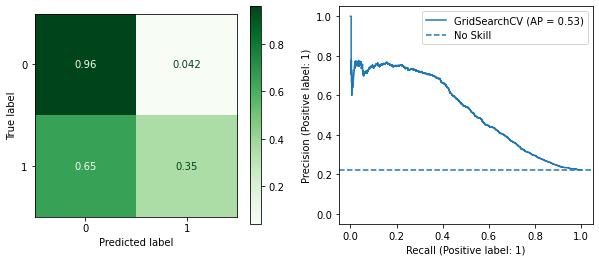

Support Vector Machine with PCA
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best validation score:	0.452377656956216
Test Scores:
- Accuracy:	0.8216457235508715
- Recall:	0.34948516050878253
- Precision:	0.701093560145808
- F1-score:	0.4664510913500404
- AUC:		0.5978471227918272


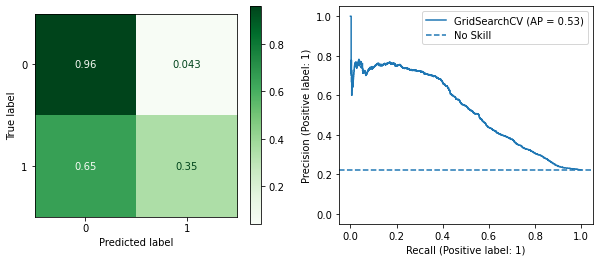

Support Vector Machine with PCA + SMOTE oversampling
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation score:	0.6755793952290514
Test Scores:
- Accuracy:	0.7698959600054047
- Recall:	0.5693519079345851
- Precision:	0.4865424430641822
- F1-score:	0.5246999720904271
- AUC:		0.5759812249521603


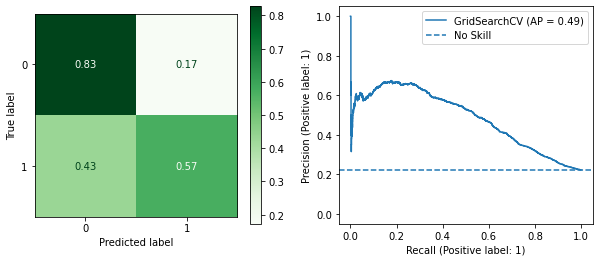

Support Vector Machine with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation score:	0.7622860213760343
Test Scores:
- Accuracy:	0.7470612079448723
- Recall:	0.49061175045427013
- Precision:	0.43997827267789247
- F1-score:	0.46391752577319584
- AUC:		0.5221116579652165


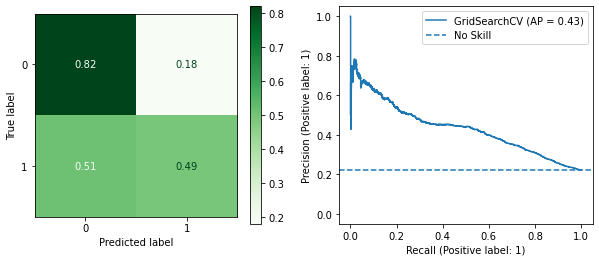

Support Vector Machine with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation score:	0.6921628171993855
Test Scores:
- Accuracy:	0.5714092690177003
- Recall:	0.7383403997577226
- Precision:	0.3079060368779995
- F1-score:	0.43458110516934045
- AUC:		0.5523084635549912


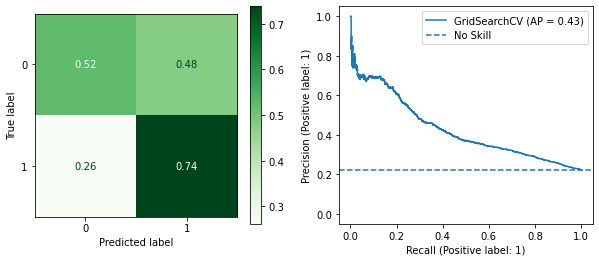

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.822186  0.350697   0.703524  0.468068   
PCA                                  0.821646  0.349485   0.701094  0.466451   
PCA + SMOTE oversampling             0.769896  0.569352   0.486542  0.524700   
PCA + KMeansSMOTE oversampling       0.747061  0.490612   0.439978  0.463918   
PCA + ClusterCentroids oversampling  0.571409  0.738340   0.307906  0.434581   

                                          AUC  
Raw data                             0.599533  
PCA                                  0.597847  
PCA + SMOTE oversampling             0.575981  
PCA + KMeansSMOTE oversampling       0.522112  
PCA + ClusterCentroids oversampling  0.552308

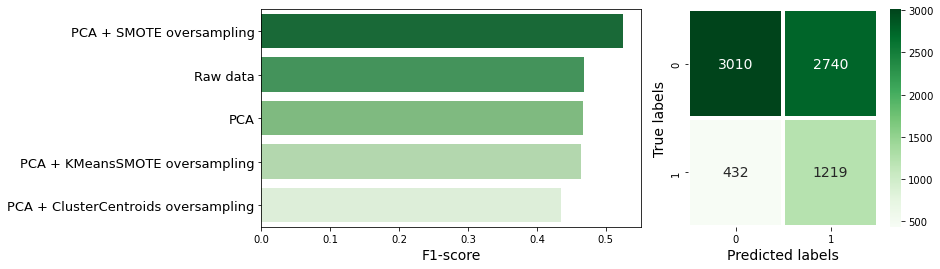

In [45]:
params_svm = {'C': [1e-1, 1e0, 1e1, 1e2], 
              'kernel': ['rbf', 'poly'], 
              'gamma': [1e-1, 'scale']}
for idx, oversample in enumerate(oversample_method):
    print(f"Support Vector Machine with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = pipeline(SVC(),
                         params_svm,
                         oversample)
    scores_svm['Accuracy'][idx] = scores[0]
    scores_svm['Recall'][idx] = scores[1]
    scores_svm['Precision'][idx] = scores[2]
    scores_svm['F1-score'][idx] = scores[3]
    scores_svm['AUC'][idx] = scores[4]
    
scores_svm_df = pd.DataFrame(data=scores_svm, index=oversample_names)
plot = plot_summary(scores_svm_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summarySVM.svg")
scores_svm_df

The outputs above show that the Grid-Search usually selects the `rbf` kernel and a high value of `C`. This means that the model aims to correctly classify all training examples, rather than building a smooth decision boundary.

We can see in the dataframe that in this case not oversampling still leads to good results on the test set in terms of F1-score. We think it is due to the fact that the model needs few significant examples to be used as support vectors to build the decision boundary.

<a id='tree'></a>
## 5.3 Tree-Based Methods
Tree-based methods provide a simple, intuitive, and powerful mechanism for both regression and classification. The main idea is to *stratify* a (potentially complicated) feature space into smaller regions and fit a simple prediction function to each region [\[16\]](#kroese). In order to classify a given observation, we typically use the mode response value for the training observations in the region to which it belongs. Since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as *decision tree* methods [\[17\]](#james).

### 5.3.1 Decision Trees
Decision tree classifiers are attractive models if we care about interpretability. They involve creating a set of binary splits on the predictor variables in order to create a tree that can be used to classify new observations into one of two groups [\[21\]](#r-in-action).

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest *information gain* (IG):
- if the predictor is continuous, we choose a cut-point that maximizes purity for the two groups created;
- if the predictor variable is categorical, we combine the categories to obtain two groups with maximum purity.

In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each node all belong to the same class. Unfortunately, this process tends to produce a tree that is too large and suffers from overfitting. Thus, we typically prune the tree by setting a limit for the maximal depth of the tree.

Considering a binary decision tree, we define the IG at each split as follows:

$$IG(D_p, f)=I(D_p)-\sum_{j\in\{left,right\}}{\frac{N_{j}}{N_p}I(D_{j})}$$

- $f$ is the feature to perform the split;
- $D_p$ and $D_j$ are the dataset of the parent and $j$th child nodes;
- $I$ is our impurity measure;
- $N_p$ is the total number of training examples at the parent node, and $N_j$ is the number of examples in the $j$th child node.

Hence, the information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities. In order to split the nodes at the most informative features, we need to maximize the IG at each split.

**Gini impurity** ($I_G$) and **entropy** ($I_H$) are the most commonly used splitting criteria in binary decision trees. Definying as $p(i|t)$ the proportion of the examples that belong to class $i$ for a particular node $t$, we can write the entropy as:

$$I_H(t)=-\sum_{i=1}^{c}{p(i|t)\log_2{p(i|t)}}$$

and the Gini impurity as:

$$I_G(t)=\sum_{i=1}^{c}{p(i|t)(1-p(i|t))}$$

Below we build a shallow decision tree using raw data from our dataset to show its interpretability. Since we are not going deep, the classes are still distributed uniformly at the terminal nodes (i.e., the *leaves*) and the entropy measure is very high.

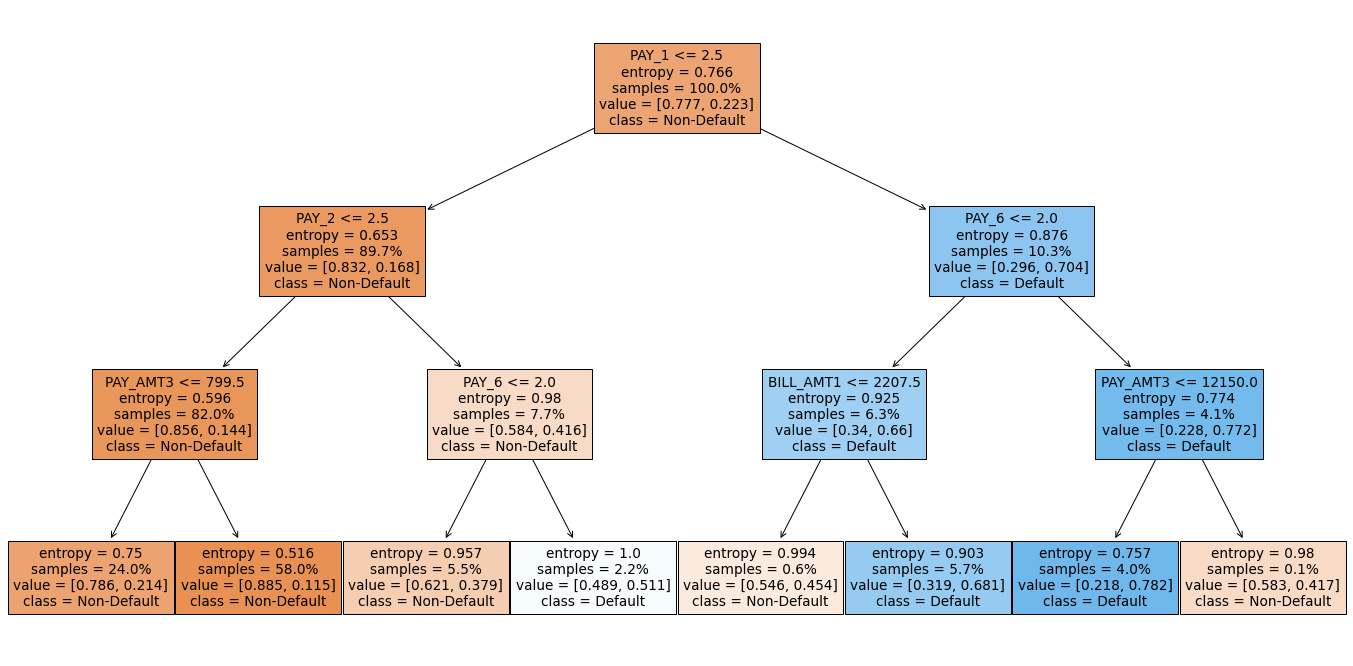

In [46]:
clf = DecisionTreeClassifier(max_depth=3, 
                             criterion='entropy', 
                             max_features=None)
clf.fit(X_train_raw, y_train)
plt.figure(figsize=(24,12))
tree.plot_tree(decision_tree=clf,
               feature_names=X_train_raw.columns, 
               class_names=['Non-Default','Default'],
               filled=True, proportion=True)
plt.show()

In practice, both Gini impurity and entropy typically yield very similar results. Hence, we think it is not worth spending much time on evaluating trees using different impurity criteria, and we rather experiment with different pruning cut-offs.

```python
params = {'max_depth': [5, 10, 20, 30, 50],
          'criterion': ['entropy']}
```

In [47]:
def plot_tree_test_scores(model, oversample, plot):
    
    if oversample == 'raw':
        X_test_s = X_test_raw.copy()
    else:
        X_test_s = X_test.copy()
        
    # predict 
    y_pred = model.predict(X_test_s)
    
    # various tests
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)
    
    #print on console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")
    
    #plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15,4))
        
        tmp = pd.DataFrame({'Feature': X_test_s.columns, 
                            'Feature importance': model.best_estimator_.feature_importances_})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[2])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[2].legend(loc = 'upper right')
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[1])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[1].legend(loc = 'upper right')
        plt.show()
    
    return test_acc, test_recall, test_precision, test_f1, test_auc

def tree_pipeline(model, params, oversample=None, plot=False):
    
    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0
    
    if oversample:
        if oversample == 'raw': #without PCA
            X_train_s = X_train_raw.copy() #original data scaled
            y_train_s = y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s = X_train.copy() #with PCA without resampling
        y_train_s = y_train.copy()
        X_test_f1 = X_test.copy()
    
    #gridsearch best parameter
    gridsearch = GridSearchCV(estimator = model,
                      param_grid = params,
                      scoring = 'f1',
                      cv = 5, 
                      n_jobs = -1,
                      verbose = True)
    gridsearch.fit(X_train_s, y_train_s)
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")
    
    test_scores = plot_tree_test_scores(gridsearch, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_
    
    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred),2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1
    
    return test_scores, y_pred_max, y_test_max

In [48]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_tree = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Decision Tree with Raw data
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.45813216221308634
Test Scores:
- Accuracy:	0.8205647885420889
- Recall:	0.35978195033313143
- Precision:	0.6867052023121387
- F1-score:	0.47217806041335453
- AUC:		0.5946528453403355


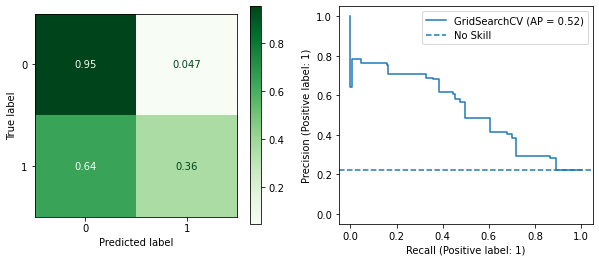

Decision Tree with PCA
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 10}
Best validation score:	0.430074611221572
Test Scores:
- Accuracy:	0.8078638021888934
- Recall:	0.3579648697758934
- Precision:	0.6201469045120671
- F1-score:	0.4539170506912442
- AUC:		0.5606678314758273


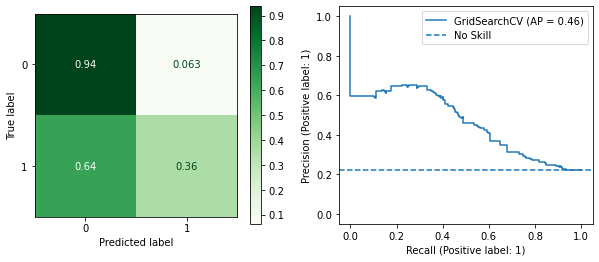

Decision Tree with PCA + SMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 50}
Best validation score:	0.762111126627109
Test Scores:
- Accuracy:	0.6842318605593839
- Recall:	0.48152634766807995
- Precision:	0.3492970123022847
- F1-score:	0.40488922841864017
- AUC:		0.47324170295505125


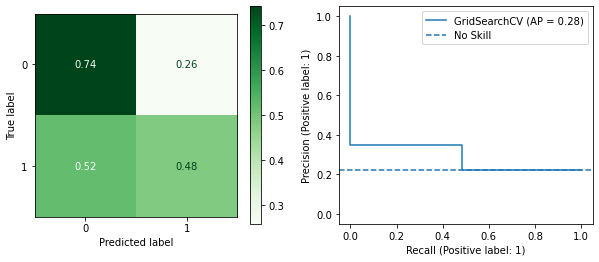

Decision Tree with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 20}
Best validation score:	0.7834135816908295
Test Scores:
- Accuracy:	0.7459802729360897
- Recall:	0.42216838279830404
- Precision:	0.42945163277880466
- F1-score:	0.42577886377519847
- AUC:		0.4902607576872167


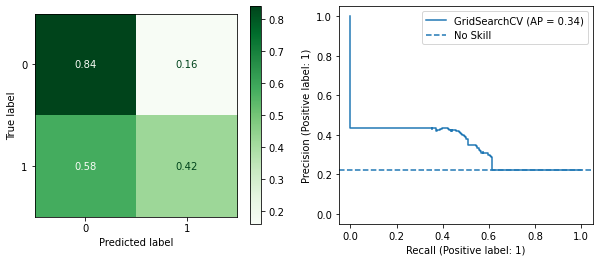

Decision Tree with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 10}
Best validation score:	0.656376360481173
Test Scores:
- Accuracy:	0.5460072963113093
- Recall:	0.6747425802543913
- Precision:	0.28295656591313184
- F1-score:	0.3987115246957767
- AUC:		0.5151284543160275


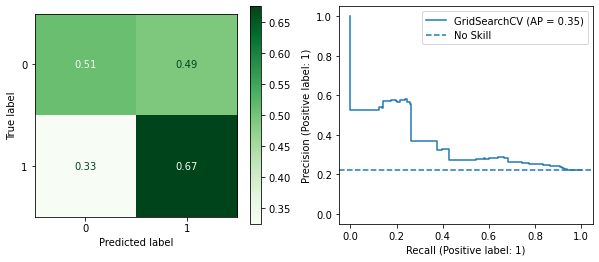

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.820565  0.359782   0.686705  0.472178   
PCA                                  0.807864  0.357965   0.620147  0.453917   
PCA + SMOTE oversampling             0.684232  0.481526   0.349297  0.404889   
PCA + KMeansSMOTE oversampling       0.745980  0.422168   0.429452  0.425779   
PCA + ClusterCentroids oversampling  0.546007  0.674743   0.282957  0.398712   

                                          AUC  
Raw data                             0.594653  
PCA                                  0.560668  
PCA + SMOTE oversampling             0.473242  
PCA + KMeansSMOTE oversampling       0.490261  
PCA + ClusterCentroids oversampling  0.515128

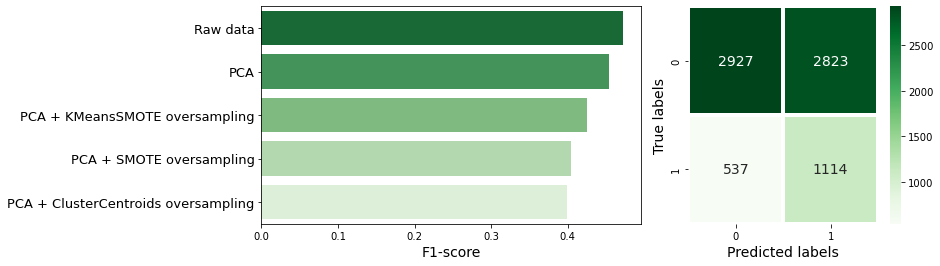

In [49]:
params_tree = {'max_depth': [5, 10, 20, 30, 50]}
for idx, oversample in enumerate(oversample_method):
    print(f"Decision Tree with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(DecisionTreeClassifier(criterion='entropy', max_features=None, random_state=24),
                         params_tree,
                         oversample)
    scores_tree['Accuracy'][idx] = scores[0]
    scores_tree['Recall'][idx] = scores[1]
    scores_tree['Precision'][idx] = scores[2]
    scores_tree['F1-score'][idx] = scores[3]
    scores_tree['AUC'][idx] = scores[4]
    
scores_rf_tree = pd.DataFrame(data=scores_tree, index=oversample_names)
plot = plot_summary(scores_rf_tree["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryTree.svg")
scores_rf_tree

The results reported in the dataframe above show that the decision tree works best with raw data. Having this baseline, we try to improve predictive performance by aggregating different decision trees in a random forest.

### 5.3.2 Random Forest
Decision trees are said to suffer from *high variance*, as if we randomly split the training data into two parts, and fit a decision tree on both halves, we could get quite different results [\[17\]](#james). We want to lower the variance of our model in order to obtain similar results if we apply it repeatedly on different datasets. It is possible to reduce the variance of a model by building an *ensemble* of several classifiers trained on different sets from a population, and averaging the resulting predictions. However, in our case we do not have access to multiple training sets, so we take repeated samples from our dataset to generate different *bootstrapped training sets*. In this way we can build several decision trees whose predictions we can aggregate with a *majority voting* procedure. This approach is called *bootstrap aggregating*, or **bagging**.

The major idea of **random forests** is to perform bagging in combination with a *decorrelation* of the trees. For each bootstrapped training set, we build a decision tree using a randomly selected *subset* of features for the splitting rules. Typically, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors. This simple but powerful idea will decorrelate the trees, since strong predictors will have a smaller chance to be considered at the root levels.

In the `RandomForestClassifier` implementation in Scikit-Learn, the size of the bootstrap sample is chosen to be equal to the number of training examples in the original training dataset, which usually provides a good
bias-variance tradeoff [\[4\]](#raschka). In our model selection procedure, we do not even have to worry about the depth of the trees, since the forest is quite robust to the noise from the single tree. We are rather interested in the number of trees that form the forest and the maximum number of features to consider when looking for the best split: if the latter number is `None`, we are not decorrelating the trees and we are performing bagging.

```python
params = {'n_estimators': [10, 50, 100, 200], 
          'max_features': [None, 'sqrt']}
```

In [50]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_rf = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Random Forest with Raw data
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.4695030676559674
Test Scores:
- Accuracy:	0.8209701391703824
- Recall:	0.39672925499697154
- Precision:	0.665650406504065
- F1-score:	0.49715370018975336
- AUC:		0.598478035047235


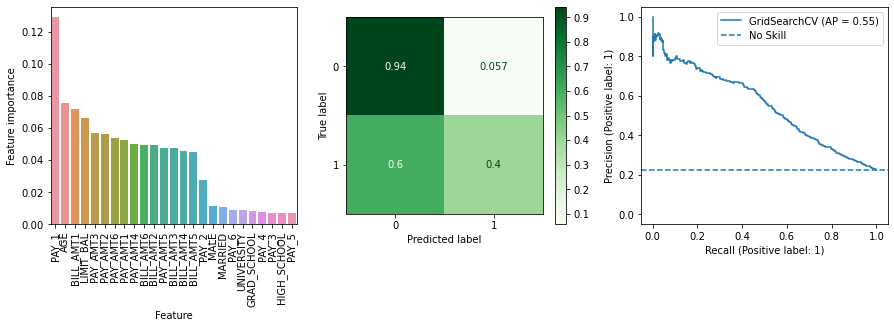

Random Forest with PCA
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 100}
Best validation score:	0.4419014087953347
Test Scores:
- Accuracy:	0.8074584515605999
- Recall:	0.36281041792852814
- Precision:	0.6162551440329218
- F1-score:	0.45672893633244377
- AUC:		0.5606042578081807


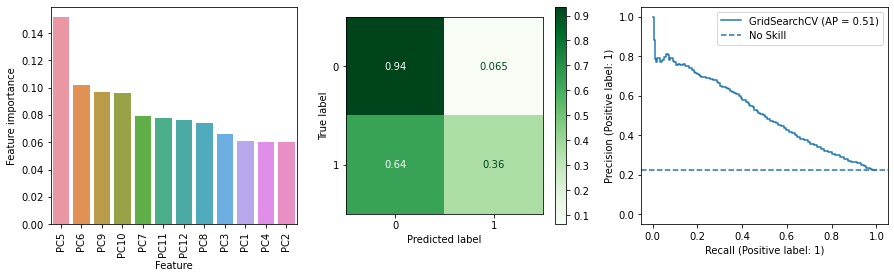

Random Forest with PCA + SMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': 'sqrt', 'n_estimators': 200}
Best validation score:	0.8350874582586624
Test Scores:
- Accuracy:	0.7647615187136874
- Recall:	0.5160508782556027
- Precision:	0.47491638795986624
- F1-score:	0.4946298984034833
- AUC:		0.5494628251088154


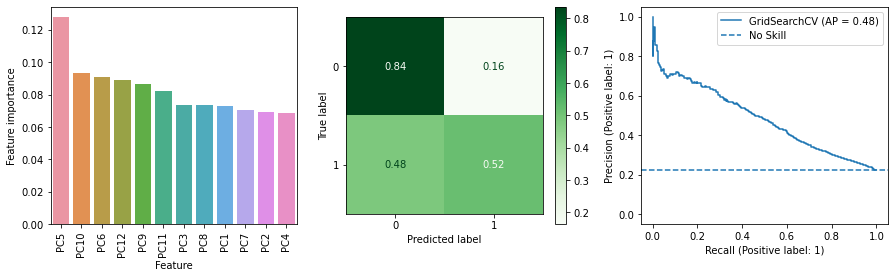

Random Forest with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.8111537515961622
Test Scores:
- Accuracy:	0.7844885826239697
- Recall:	0.4270139309509388
- Precision:	0.5206794682422452
- F1-score:	0.46921797004991683
- AUC:		0.537756981990863


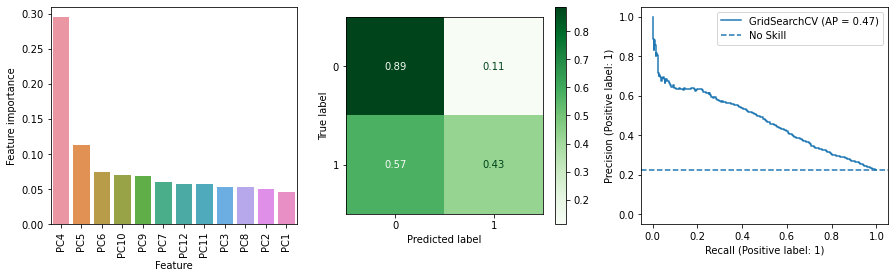

Random Forest with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 100}
Best validation score:	0.6674024856384421
Test Scores:
- Accuracy:	0.5830293203621132
- Recall:	0.6499091459721381
- Precision:	0.2996369729125942
- F1-score:	0.4101681957186544
- AUC:		0.5138218366346375


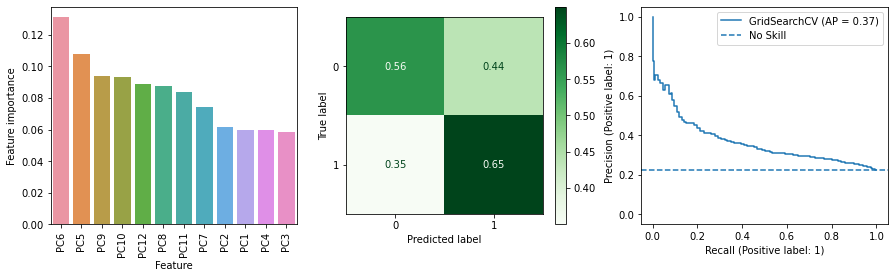

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.820970  0.396729   0.665650  0.497154   
PCA                                  0.807458  0.362810   0.616255  0.456729   
PCA + SMOTE oversampling             0.764762  0.516051   0.474916  0.494630   
PCA + KMeansSMOTE oversampling       0.784489  0.427014   0.520679  0.469218   
PCA + ClusterCentroids oversampling  0.583029  0.649909   0.299637  0.410168   

                                          AUC  
Raw data                             0.598478  
PCA                                  0.560604  
PCA + SMOTE oversampling             0.549463  
PCA + KMeansSMOTE oversampling       0.537757  
PCA + ClusterCentroids oversampling  0.513822

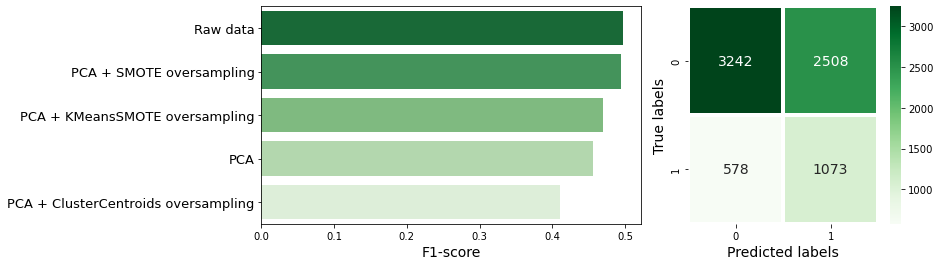

In [51]:
params_rf = {'n_estimators': [10, 50, 100, 200], 
             'max_features': [None, 'sqrt']}
for idx, oversample in enumerate(oversample_method):
    print(f"Random Forest with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(RandomForestClassifier(criterion='entropy', random_state=24, n_jobs=-1),
                         params_rf,
                         oversample,
                         True)
    scores_rf['Accuracy'][idx] = scores[0]
    scores_rf['Recall'][idx] = scores[1]
    scores_rf['Precision'][idx] = scores[2]
    scores_rf['F1-score'][idx] = scores[3]
    scores_rf['AUC'][idx] = scores[4]
    
scores_rf_df = pd.DataFrame(data=scores_rf, index=oversample_names)
plot = plot_summary(scores_rf_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryRF.svg")
scores_rf_df

The results reported in the dataframe above show that aggregating multiple trees in a forest leads to an overall improvement in prediction performance. Bagging and Random Forest models are not interpretable as individual decision trees. However, they allow us to measure and plot the feature importance as the averaged impurity decrease computed from all decision trees in the ensemble, without making any assumptions about whether our data are linearly separable or not.

In particular, we can refer to the Random Forest trained on raw data, as it offers a really useful features importance plot. When financial institutions consider issuing the client a credit card, they need to check the payment history of that person, because if he owes numerous bills already, he is likely to delay the payment of the current month. Besides the payment history, it is also imperative to look at the applicants' credit limit of their current credit cards. This is a result of a virtuous
circle: people who pay on duly tend to have better credit scores, so the banks prefer to increase these people's credit lines by taking less risk. Client's personal information also affects the default behavior, as it is collected by the banks when people apply for credit cards. However, we believe that financial institutions should equally consider their potential clients whether they are men or women, high school or university graduate, single or married, when decide whether approve their credit card applications.

<a id='results'></a>
## 5.4 Models' Performance Results
The dataframe below summarizes the results of the combination of different ML algorithms and oversampling techniques on the test set. The figure further down compares the F1-scores of the different models on the test set. We want to clarify that Logistic Regression and SVM did not work with true *raw* data, but with normalized data, unlike Decision Tree and Random Forest.

In [52]:
frames = [scores_lr_df, scores_svm_df, scores_rf_tree, scores_rf_df]
scores_df = pd.concat(frames, keys=['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest'])
scores_df

Accuracy  \
Logistic Regression    Raw data                             0.804891   
                       PCA                                  0.804216   
                       PCA + SMOTE oversampling             0.631942   
                       PCA + KMeansSMOTE oversampling       0.724767   
                       PCA + ClusterCentroids oversampling  0.597757   
Support Vector Machine Raw data                             0.822186   
                       PCA                                  0.821646   
                       PCA + SMOTE oversampling             0.769896   
                       PCA + KMeansSMOTE oversampling       0.747061   
                       PCA + ClusterCentroids oversampling  0.571409   
Decision Tree          Raw data                             0.820565   
                       PCA                                  0.807864   
                       PCA + SMOTE oversampling             0.684232   
                       PCA + KMeansSMOTE oversampling       0.745980   
                       PCA + ClusterCentroids oversampling  0.546007   
Random Forest          Raw data                             0.820970   
                       PCA                                  0.807458   
                       PCA + SMOTE oversampling             0.764762   
                       PCA + KMeansSMOTE oversampling       0.784489   
                       PCA + ClusterCentroids oversampling  0.583029   

                                                              Recall  \
Logistic Regression    Raw data                             0.196245   
                       PCA                                  0.192005   
                       PCA + SMOTE oversampling             0.679588   
                       PCA + KMeansSMOTE oversampling       0.363416   
                       PCA + ClusterCentroids oversampling  0.666263   
Support Vector Machine Raw data                             0.350697   
                       PCA                                  0.349485   
                       PCA + SMOTE oversampling             0.569352   
                       PCA + KMeansSMOTE oversampling       0.490612   
                       PCA + ClusterCentroids oversampling  0.738340   
Decision Tree          Raw data                             0.359782   
                       PCA                                  0.357965   
                       PCA + SMOTE oversampling             0.481526   
                       PCA + KMeansSMOTE oversampling       0.422168   
                       PCA + ClusterCentroids oversampling  0.674743   
Random Forest          Raw data                             0.396729   
                       PCA                                  0.362810   
                       PCA + SMOTE oversampling             0.516051   
                       PCA + KMeansSMOTE oversampling       0.427014   
                       PCA + ClusterCentroids oversampling  0.649909   

                                                            Precision  \
Logistic Regression    Raw data                              0.734694   
                       PCA                                   0.733796   
                       PCA + SMOTE oversampling              0.338257   
                       PCA + KMeansSMOTE oversampling        0.378310   
                       PCA + ClusterCentroids oversampling   0.311968   
Support Vector Machine Raw data                              0.703524   
                       PCA                                   0.701094   
                       PCA + SMOTE oversampling              0.486542   
                       PCA + KMeansSMOTE oversampling        0.439978   
                       PCA + ClusterCentroids oversampling   0.307906   
Decision Tree          Raw data                              0.686705   
                       PCA                                   0.620147   
                       PCA + SMOTE oversampling              0.349297   
            

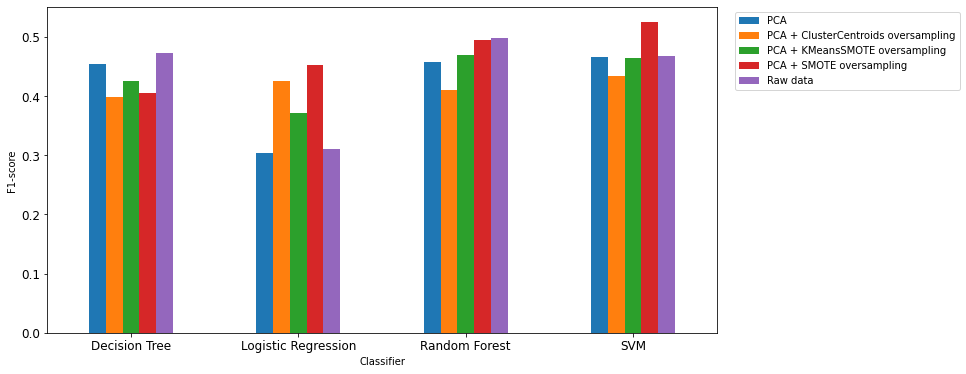

In [53]:
scores_lr_df['Classifier'] = 'Logistic Regression'
scores_lr_df['Technique'] = scores_lr_df.index
#scores_lr_df['Technique'][scores_lr_df['Technique']=='Normalized data'] = 'Raw data'
scores_svm_df['Classifier'] = 'SVM'
scores_svm_df['Technique'] = scores_svm_df.index
#scores_svm_df['Technique'][scores_svm_df['Technique']=='Normalized data'] = 'Raw data'
scores_rf_tree['Classifier'] = 'Decision Tree'
scores_rf_tree['Technique'] = scores_rf_tree.index
scores_rf_df['Classifier'] = 'Random Forest'
scores_rf_df['Technique'] = scores_rf_df.index

frames2 = [scores_lr_df, scores_svm_df, scores_rf_tree, scores_rf_df]
scores = pd.concat(frames2, ignore_index=True, keys=None)

scores.set_index(['Technique', 'Classifier']).unstack(0).plot(kind='bar', 
                                                              y='F1-score', 
                                                              ylabel='F1-score', 
                                                              figsize=(12,6), 
                                                              fontsize=12, 
                                                              rot=0).legend(bbox_to_anchor=(1.02, 1))

En g√©n√©ral, l‚Äôoversampling am√©liore les performances pr√©dictives par rapport √† l‚Äôundersampling. L‚Äôalgorithme original SMOTE donne de meilleurs r√©sultats que ses variantes r√©centes, notamment lorsqu‚Äôil est coupl√© √† un SVM, o√π il permet d‚Äôobtenir le meilleur mod√®le.
Cela dit, il convient de souligner les excellents r√©sultats obtenus avec la for√™t al√©atoire. Ce mod√®le se distingue non seulement par ses performances sur les donn√©es brutes (deuxi√®me meilleur score global), mais aussi par sa capacit√© √† fournir un classement des variables importantes, ce qui constitue un atout majeur pour les institutions financi√®res partenaires.

<a id='conclusion'></a>
# 6. Conclusion
Dans ce travail, nous avons appliqu√© des m√©thodes de machine learning supervis√©es pour pr√©dire le comportement de remboursement des clients de cartes de cr√©dit, en nous appuyant sur le jeu de donn√©es Default of credit card clients.

Apr√®s une analyse exploratoire, un pr√©traitement rigoureux (normalisation, PCA), et la gestion du d√©s√©quilibre des classes (Cluster Centroids, SMOTE), nous avons test√© plusieurs mod√®les. Le SVM a donn√© les meilleurs r√©sultats pr√©dictifs, tandis que la for√™t al√©atoire s‚Äôest montr√©e tr√®s performante et interpr√©table, ce qui est pr√©cieux pour des institutions comme BNP Paribas.

Des am√©liorations restent possibles, notamment en explorant des mod√®les de boosting et des m√©thodes d‚Äôensemble comme un voting classifier (SVM, Random Forest, KNN). Enfin, int√©grer des indicateurs √©conomiques permettrait de construire un mod√®le plus robuste et adapt√© √† l‚Äô√©volution constante du march√© financier.

<a id='references'></a>
# References
<a id='yeh2009'></a>[1] I-Cheng Yeh, Che-hui Lien, ¬´ Comparaison des techniques d'exploration de donn√©es pour la pr√©cision pr√©dictive de la probabilit√© de d√©faut des clients de cartes de cr√©dit ¬ª, Expert Systems with Applications, vol. 36, n¬∞ 2, 2009, pp. 2473‚Äì2480. https://doi.org/10.1016/j.eswa.2007.12.020
<br>

<a id='uci'></a>[2] D. Dua et C. Graff, UCI Machine Learning Repository : jeu de donn√©es sur le d√©faut de paiement de clients de cartes de cr√©dit, University of California, School of Information and Computer Science, Irvine, 2019. https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
<br>

<a id='alam2021'></a>[3] T. M. Alam et al., ¬´ Une √©tude sur la pr√©diction du d√©faut de paiement par carte de cr√©dit dans les jeux de donn√©es d√©s√©quilibr√©s ¬ª, IEEE Access, vol. 8, 2020, pp. 201173‚Äì201198. https://doi.org/10.1109/ACCESS.2020.3033784
<br>

<a id='raschka'></a>[4] Sebastian Raschka, Python Machine Learning, 3e √©d., Packt Publishing, 2019.
<br>

<a id='chen2021'></a>[5] Ying Chen, Ruirui Zhang, ¬´ Pr√©diction du d√©faut de carte de cr√©dit bas√©e sur K-Means SMOTE et r√©seau de neurones BP ¬ª, Complexity, vol. 2021, Article ID 6618841, 13 pages. https://doi.org/10.1155/2021/6618841
<br>

<a id='shalev'></a>[6] S. Shalev-Shwartz, S. Ben-David, Comprendre l'apprentissage automatique : de la th√©orie aux algorithmes, Cambridge University Press, 2014. https://doi.org/10.1017/CBO9781107298019
<br>

<a id='yen2009'></a>[7] Show-Jane Yen, Yue-Shi Lee, ¬´ Approches de sous-√©chantillonnage bas√©es sur des clusters pour les distributions de donn√©es d√©s√©quilibr√©es ¬ª, Expert Systems with Applications, vol. 36, n¬∞ 3, 2009, pp. 5718‚Äì5727. https://doi.org/10.1016/j.eswa.2008.06.108
<br>

<a id='imbalanced_learn'></a>[8] G. Lemaitre et al., ¬´ Imbalanced-learn : une bo√Æte √† outils Python pour traiter le d√©s√©quilibre des ensembles de donn√©es en apprentissage automatique ¬ª, 2016. https://arxiv.org/abs/1609.06570
<br>

<a id='cc_img'></a>[9] Q. Zou et al., ¬´ Une approche pour l'identification des cytokines bas√©e sur un nouveau classifieur ensembliste ¬ª, BioMed Research International, 2013. https://doi.org/10.1155/2013/686090
<br>

<a id='smote'></a>[10] N. V. Chawla et al., ¬´ SMOTE : technique de sur-√©chantillonnage synth√©tique de la classe minoritaire ¬ª, Journal of Artificial Intelligence Research, pp. 321‚Äì357, 2002. https://arxiv.org/abs/1106.1813
<br>

<a id='k-means-smote'></a>[11] F. Last et al., ¬´ Sur-√©chantillonnage pour apprentissage d√©s√©quilibr√© bas√© sur K-Means et SMOTE ¬ª, Information Sciences, vol. 465, 2018. https://arxiv.org/abs/1711.00837
<br>

<a id='cv10'></a>[12] Ron Kohavi, ¬´ √âtude de la validation crois√©e et du bootstrap pour l‚Äôestimation de la pr√©cision et la s√©lection de mod√®les ¬ª, IJCAI‚Äô95, vol. 2, 1995, pp. 1137‚Äì1143. https://dl.acm.org/doi/10.5555/1643031.1643047
<br>

<a id='tan2016'></a>[13] P.N. Tan et al., Introduction √† l'exploration de donn√©es, Pearson Education India, 2016.
<br>

<a id='ch8'></a>[14] N. Japkowicz, ¬´ M√©triques d'√©valuation pour apprentissage d√©s√©quilibr√© ¬ª, Imbalanced Learning, pp. 187‚Äì206, 2013. https://doi.org/10.1002/9781118646106.ch8
<br>

<a id='agresti'></a>[15] Alan Agresti, Introduction √† l'analyse des donn√©es cat√©gorielles, 3e √©d., John Wiley & Sons, 2018.
<br>

<a id='kroese'></a>[16] D.P. Kroese et al., Science des donn√©es et apprentissage automatique : m√©thodes math√©matiques et statistiques, Chapman & Hall, 2019. https://people.smp.uq.edu.au/DirkKroese/DSML/
<br>

<a id='james'></a>[17] G. James et al., Introduction √† l‚Äôapprentissage statistique, 2e √©d., Springer, 2021. https://www.statlearning.com/
<br>

<a id='sklearn'></a>[18] F. Pedregosa et al., ¬´ Scikit-learn : apprentissage automatique en Python ¬ª, Journal of Machine Learning Research, vol. 12, pp. 2825‚Äì2830, 2011. https://scikit-learn.org/stable/
<br>

<a id='mohri'></a>[19] M. Mohri et al., Fondations de l'apprentissage automatique, MIT Press, 2018. https://cs.nyu.edu/~mohri/mlbook/
<br>

<a id='smola'></a>[20] A. Smola, S.V.N. Vishwanathan, Introduction √† l'apprentissage automatique, 2008. https://alex.smola.org/drafts/thebook.pdf
<br>

<a id='r-in-action'></a>[21] Robert I. Kabacoff, R en action, 2e √©d., Manning Publications, 2015. http://www.cs.uni.edu/~jacobson/4772/week11/R_in_Action.pdf
<br>